<img src="img/decisionmaking.png" width="400">

<p style="font-size:35px">ELEC-E7890 - User Research<br></p>
<p style="font-size:30px">Lecture 4 - Data Visualization</p>

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Learning objectives</h2>
    
Learn by a series of examples good practices for data visualization, what allows to transmit the *right* message *efficiently*.
</div>

#### Setup Python environment <a class="tocSkip"></a>

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import math

import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

import scipy.stats as stats

import gzip

%config InlineBackend.figure_format='retina' # For not burning your eyes
sns.set_theme(style="white")
np.set_printoptions(threshold=8) # Don't print to much elements when printing arrays 

# Data visualization: Why?

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
<b>A series of numbers is poorly informative in itself</b>, as it is difficult to interpret.
</div>

Let's take an example...

Case adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>),
itself adapted from 
    <a href="https://archive.nytimes.com/www.nytimes.com/imagepages/2007/07/29/health/29cancer.graph.web.html">The New York Times</a>.

#### Load the data <a class="tocSkip"></a>

In [2]:
diseases   = ["Kidney Cancer", "Bladder Cancer", "Esophageal Cancer",
              "Ovarian Cancer", "Liver Cancer", "Non-Hodgkin's\nlymphoma",
              "Leukemia", "Prostate Cancer", "Pancreatic Cancer",
              "Breast Cancer", "Colorectal Cancer", "Lung Cancer"]
men_deaths = [10000, 12000, 13000, 0, 14000, 12000,
              16000, 25000, 20000, 500, 25000, 80000]
men_cases = [30000, 50000, 13000, 0, 16000, 30000,
             25000, 220000, 22000, 600, 55000, 115000]
women_deaths = [6000, 5500, 5000, 20000, 9000, 12000,
                13000, 0, 19000, 40000, 30000, 70000]
women_cases = [20000, 18000, 5000, 25000, 9000, 29000,
               24000, 0, 21000, 160000, 55000, 97000]

df = pd.DataFrame(dict(
    diseases=diseases, men_deaths=men_deaths, men_cases=men_cases,
    women_deaths=women_deaths, women_cases=women_cases))
df

diseases  men_deaths  men_cases  women_deaths  women_cases
0             Kidney Cancer       10000      30000          6000        20000
1            Bladder Cancer       12000      50000          5500        18000
2         Esophageal Cancer       13000      13000          5000         5000
3            Ovarian Cancer           0          0         20000        25000
4              Liver Cancer       14000      16000          9000         9000
5   Non-Hodgkin's\nlymphoma       12000      30000         12000        29000
6                  Leukemia       16000      25000         13000        24000
7           Prostate Cancer       25000     220000             0            0
8         Pancreatic Cancer       20000      22000         19000        21000
9             Breast Cancer         500        600         40000       160000
10        Colorectal Cancer       25000      55000         30000        55000
11              Lung Cancer       80000     115000         70000        97000

#### Visualize data <a class="tocSkip"></a>

Yes, it is a looooooot of code for one figure!

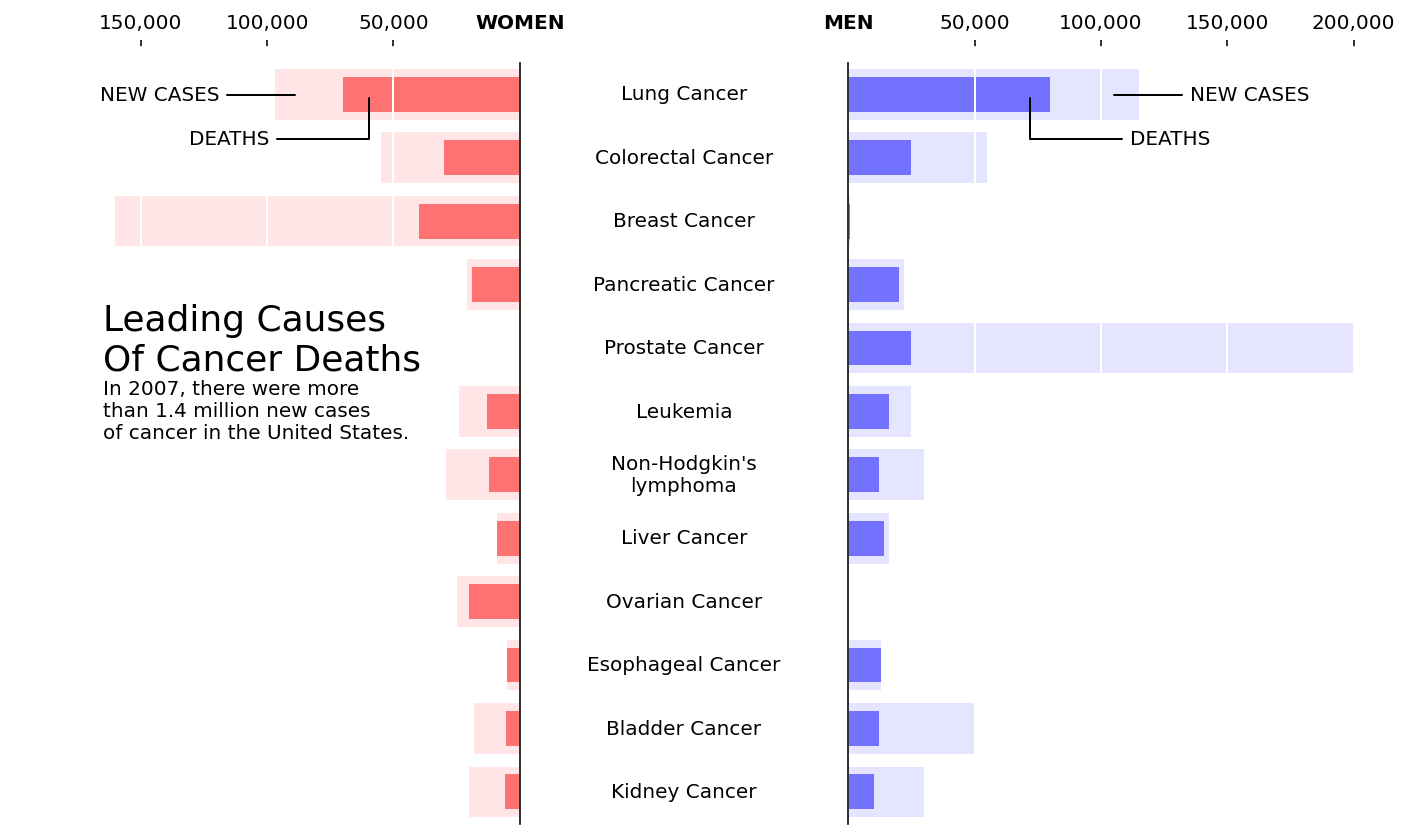

In [3]:
# Reset default settings
sns.reset_orig()

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure.subplot', wspace=.65)
matplotlib.rc('grid', color='white')
matplotlib.rc('grid', linewidth=1)

# Make figure background the same colors as axes
fig = plt.figure(figsize=(12,7), facecolor='white')

# ---WOMEN data ---
axes_left  = plt.subplot(121)

# Keep only top and right spines
axes_left.spines['left'].set_color('none')
axes_left.spines['right'].set_zorder(10)
axes_left.spines['bottom'].set_color('none')
axes_left.xaxis.set_ticks_position('top')
axes_left.yaxis.set_ticks_position('right')
axes_left.spines['top'].set_position(('data',len(diseases)+.25))
axes_left.spines['top'].set_color('w')

# Set axes limits
plt.xlim(200000,0)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([150000, 100000, 50000, 0],
           ['150,000', '100,000', '50,000', 'WOMEN'])
axes_left.get_xticklabels()[-1].set_weight('bold')
axes_left.get_xticklines()[-1].set_markeredgewidth(0)
for label in axes_left.get_xticklabels():
    label.set_fontsize(10)
plt.yticks([])



# Plot data
for i in range(len(women_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = women_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.1)
    axes_left.add_patch(p)
    # New cases
    value = women_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_left.transData,
        lw=0, facecolor='red', alpha=0.5)
    axes_left.add_patch(p)

# Add a grid
axes_left.grid()

plt.text(165000,8.2,"Leading Causes\nOf Cancer Deaths", fontsize=18,va="top")
plt.text(165000,7,"""In 2007, there were more\n"""
                  """than 1.4 million new cases\n"""
                  """of cancer in the United States.""", va="top", fontsize=10)

# --- MEN data ---
axes_right = plt.subplot(122, sharey=axes_left)

# Keep only top and left spines
axes_right.spines['right'].set_color('none')
axes_right.spines['left'].set_zorder(10)
axes_right.spines['bottom'].set_color('none')
axes_right.xaxis.set_ticks_position('top')
axes_right.yaxis.set_ticks_position('left')
axes_right.spines['top'].set_position(('data',len(diseases)+.25))
axes_right.spines['top'].set_color('w')


# Set axes limits
plt.xlim(0,200000)
plt.ylim(0,len(diseases))

# Set ticks labels
plt.xticks([0, 50000, 100000, 150000, 200000],
           ['MEN', '50,000', '100,000', '150,000', '200,000'])
axes_right.get_xticklabels()[0].set_weight('bold')
for label in axes_right.get_xticklabels():
    label.set_fontsize(10)
axes_right.get_xticklines()[1].set_markeredgewidth(0)
plt.yticks([])

# Plot data
for i in range(len(men_deaths)):
    H,h = 0.8, 0.55
    # Death
    value = men_cases[i]
    p = patches.Rectangle(
        (0, i+(1-H)/2.0), value, H, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.1)
    axes_right.add_patch(p)
    # New cases
    value = men_deaths[i]
    p = patches.Rectangle(
        (0, i+(1-h)/2.0), value, h, fill=True, transform=axes_right.transData,
        lw=0, facecolor='blue', alpha=0.5)
    axes_right.add_patch(p)

# Add a grid
axes_right.grid()

# Y axis labels
# We want them to be exactly in the middle of the two y spines
# and it requires some computations
for i in range(len(diseases)):
    x1,y1 = axes_left.transData.transform_point( (0,i+.5))
    x2,y2 = axes_right.transData.transform_point((0,i+.5))
    x,y = fig.transFigure.inverted().transform_point( ((x1+x2)/2,y1) )
    plt.text(x, y, diseases[i], transform=fig.transFigure, fontsize=10,
             horizontalalignment='center', verticalalignment='center')


# Devil hides in the details...
arrowprops = dict(arrowstyle="-",
                  connectionstyle="angle,angleA=0,angleB=90,rad=0")
x = women_cases[-1]
axes_left.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = women_deaths[-1]
axes_left.annotate('DEATHS', xy=(.85*x, 11.5),  xycoords='data',
                   horizontalalignment='right', fontsize= 10,
                   xytext=(-50, -25), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_cases[-1]
axes_right.annotate('NEW CASES', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+40, -3), textcoords='offset points',
                   arrowprops=arrowprops)

x = men_deaths[-1]
axes_right.annotate('DEATHS', xy=(.9*x, 11.5),  xycoords='data',
                   horizontalalignment='left', fontsize= 10,
                   xytext=(+50, -25), textcoords='offset points',
                   arrowprops=arrowprops)
plt.show()

Compare with just a view on the table:

In [4]:
df

diseases  men_deaths  men_cases  women_deaths  women_cases
0             Kidney Cancer       10000      30000          6000        20000
1            Bladder Cancer       12000      50000          5500        18000
2         Esophageal Cancer       13000      13000          5000         5000
3            Ovarian Cancer           0          0         20000        25000
4              Liver Cancer       14000      16000          9000         9000
5   Non-Hodgkin's\nlymphoma       12000      30000         12000        29000
6                  Leukemia       16000      25000         13000        24000
7           Prostate Cancer       25000     220000             0            0
8         Pancreatic Cancer       20000      22000         19000        21000
9             Breast Cancer         500        600         40000       160000
10        Colorectal Cancer       25000      55000         30000        55000
11              Lung Cancer       80000     115000         70000        97000

The visualization of the data definitely help to have a quick understanding of it!

# Transmit the right message

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
Do NOT <b>mislead</b> your reader/viewer (or even yourself)!
</div>

## Do NOT burn steps

<div class="alert alert-block alert-info">

Always visualize (as much as possible) <b>individual observations first</b>. 
</div>

### Remember the dinosaur

#### Dataset 1 <a class="tocSkip"></a>

Let's load the data from `circle-data.csv`

##### Load data <a class="tocSkip"></a>

In [5]:
# Load the data
df = pd.read_csv(
    os.path.join("data", "circle-data.csv"),
    index_col=[0])

# Print the top of the file
df

x          y
0    53.500480  82.351329
1    50.629577  84.715953
2    49.932717  79.284252
3    48.788095  81.244959
4    49.496214  78.992123
..         ...        ...
137  39.580304  21.216219
138  85.303704  41.078480
139  51.310546  84.395317
140  50.594653  81.292113
141  48.743542  82.405670

[142 rows x 2 columns]

You could be tempted to begin to compute descriptive statistics such as mean instead of looking to your data...

In [6]:
# For both variables
for var in "x", "y":
    
    # Compute the mean and variance and print the result showing only 2 digits after the comma
    print(f"Mean '{var}': {np.mean(df[var]):.2f} +/- {np.std(df[var]):.2f} STD")

Mean 'x': 54.27 +/- 16.70 STD
Mean 'y': 47.83 +/- 26.84 STD


And still without looking at the raw data, let's do a barplot:

##### Visualize with a simple bareplot <a class="tocSkip"></a>

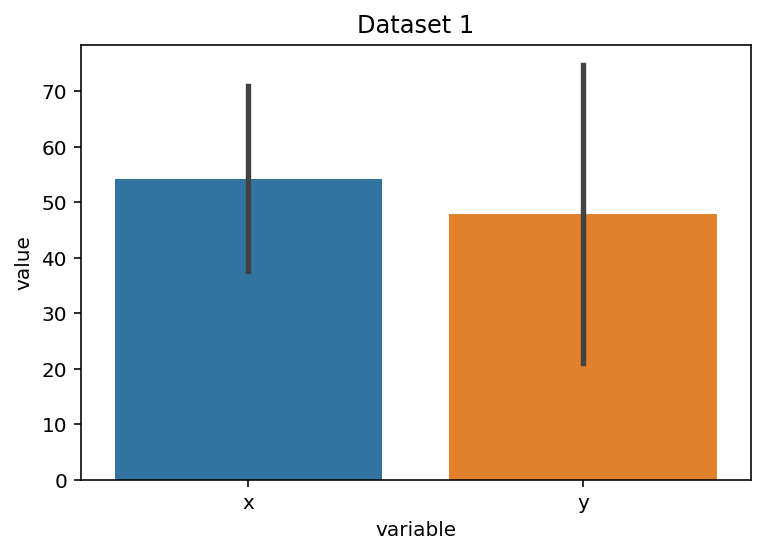

In [7]:
# Let's flip the dataframe (inverse row and columns)
df_flipped = df.melt()
# Do a barplot
sns.barplot(x="variable", y="value", data=df_flipped, ci="sd")
plt.title("Dataset 1")
plt.show()

#### Dataset 2 <a class="tocSkip"></a>

Let's consider a second dataset...

Let's load the data from `dino-data.csv`

##### Load data <a class="tocSkip"></a>

In [8]:
# Load the data
df_other = pd.read_csv(
    os.path.join("data", "dino-data.csv"),
    index_col=[0])

# Look at the top of the file
df_other

x          y
0    55.384600  97.179500
1    51.538500  96.025600
2    46.153800  94.487200
3    42.820500  91.410300
4    40.769200  88.333300
..         ...        ...
137  39.487200  25.384600
138  91.282100  41.538500
139  50.000000  95.769200
140  47.948700  95.000000
141  44.168231  92.657053

[142 rows x 2 columns]

In [9]:
# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the original dataset
    print(f"Dataset 1 - Mean '{var}': {np.mean(df[var]):.1f} +/- {np.std(df[var]):.2f} STD")
print()

# For both variables...
for var in ("x", "y"):
    
    # Print the means and variances for the second dataset
    print(f"Dataset 2 - Mean '{var}': {np.mean(df_other[var]):.1f} +/- {np.std(df_other[var]):.2f} STD")

Dataset 1 - Mean 'x': 54.3 +/- 16.70 STD
Dataset 1 - Mean 'y': 47.8 +/- 26.84 STD

Dataset 2 - Mean 'x': 54.3 +/- 16.71 STD
Dataset 2 - Mean 'y': 47.8 +/- 26.84 STD


##### Visualize with a simple bareplot <a class="tocSkip"></a>

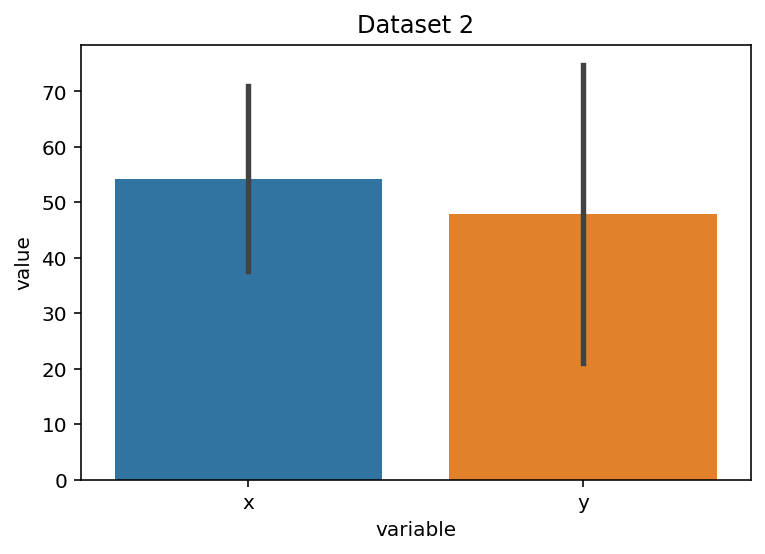

In [10]:
# Do a barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ci="sd")
plt.title("Dataset 2")
plt.show()

#### Compare by looking at the raw data <a class="tocSkip"></a>

They look quite alike, isn't it?

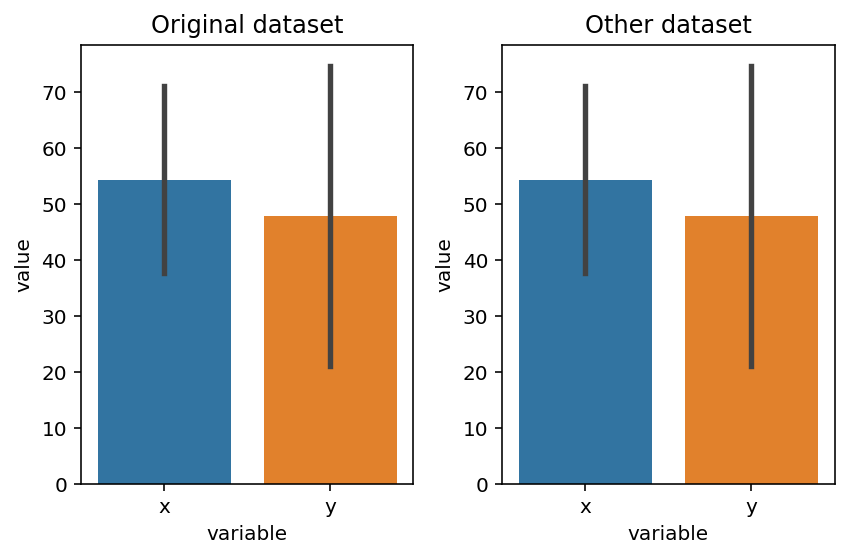

In [11]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2)

# Dot the left barplot
sns.barplot(x="variable", y="value", data=df.melt(), ax=axes[0], ci="sd")
# Set the title
axes[0].set_title("Original dataset")

# Do the right barplot
sns.barplot(x="variable", y="value", data=df_other.melt(), ax=axes[1], ci="sd")
# Set the title
axes[1].set_title("Other dataset")

plt.tight_layout()
plt.show()

However...

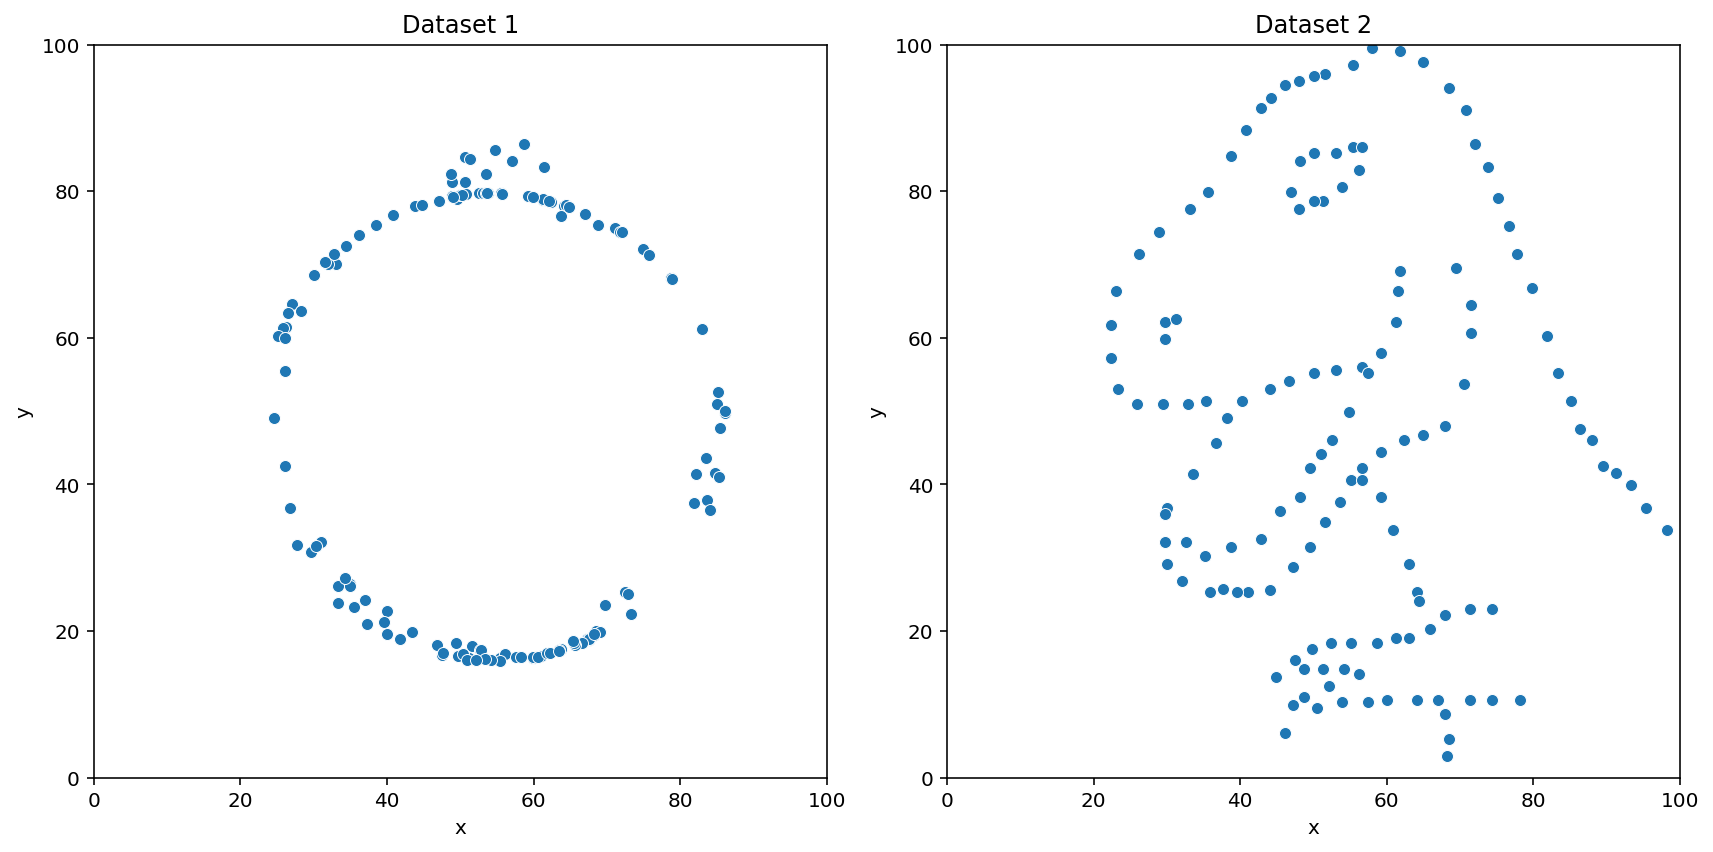

In [12]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 9))


# For both dataset
for i, (label, data) in enumerate((("Dataset 1", df), ("Dataset 2", df_other))):
    
    # Do a scatter plot
    ax = axes[i]
    sns.scatterplot(x="x", y="y", data=data, ax=ax)
    
    # Set the title
    ax.set_title(label)
    
    # Set the limits of the axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    
    # Make it look square
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

> The descriptive statistics are (almost identical) but the distributions are very different. **Look at your raw data first!**

A few more like this:

<img src="img/same_stats_fig5.png" width="700">

<img src="img/same_stats_fig6.png" width="600">

*Note: you can find a lot of astonishing examples in [Matejka, J., & Fitzmaurice, G. (2017, May). Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing. In Proceedings of the 2017 CHI Conference on Human Factors in Computing Systems (pp. 1290-1294)](https://www.autodeskresearch.com/publications/samestats).*

## Adapt the type of figure to the type of comparison/relation you aim to show

<div class="alert alert-block alert-info">

Choose a <b> representation </b>  adapted to the type of your data: <b> misrepresentations</b> leads to <b>misinterpreations</b>
</div>

### (Bad) Example: Creating bins and using barplot for showing relation between two variables

#### Remember the growth-debt example

#### Load data <a class="tocSkip"></a>

In [13]:
# Import the data
df = pd.read_csv(os.path.join("data", "rr.csv"))

# Plot the top of the file
df

Country  Year        Debt    Growth
0     Australia  1946  190.419080 -3.557951
1     Australia  1947  177.321371  2.459475
2     Australia  1948  148.929811  6.437534
3     Australia  1949  125.828699  6.611994
4     Australia  1950  109.809398  6.920201
...         ...   ...         ...       ...
1170         US  2005   62.766724  3.054518
1171         US  2006   63.489973  2.672807
1172         US  2007   63.985488  2.141613
1173         US  2008   74.091061  0.438166
1174         US  2009   83.482835 -2.730170

[1175 rows x 4 columns]

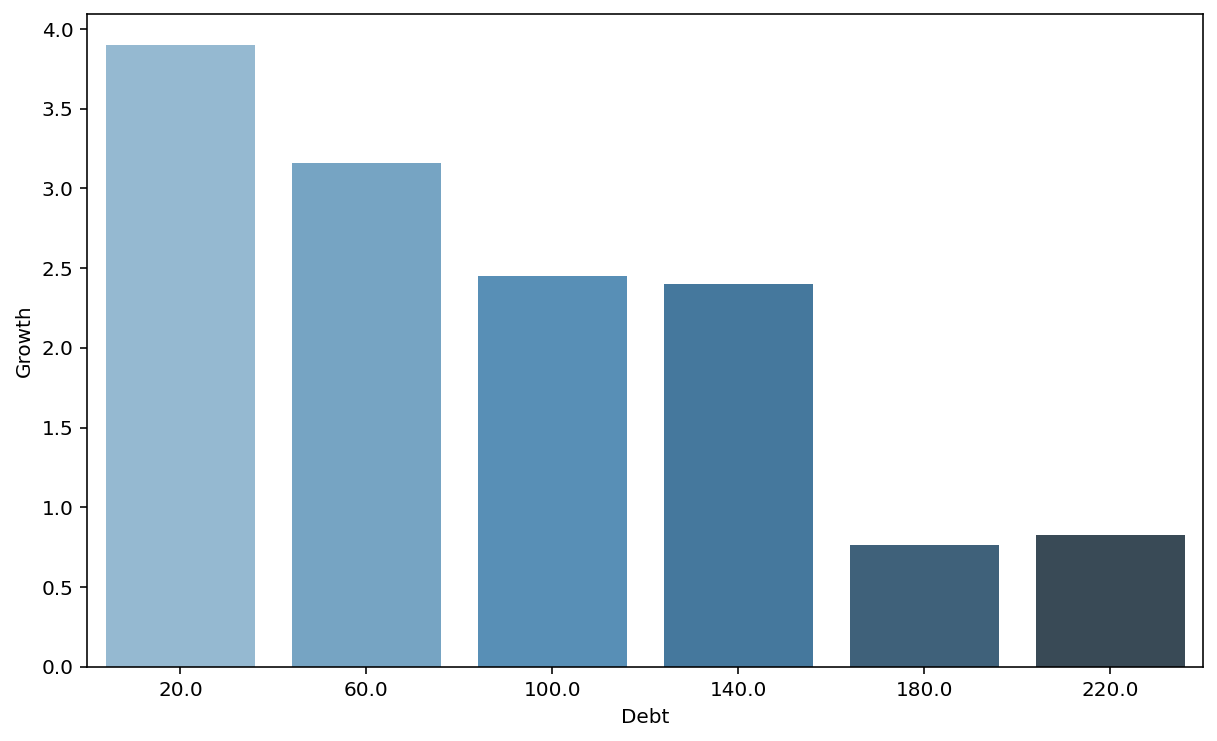

In [14]:
# Create bins
df['DebtBin'] = pd.cut(df.Debt, bins=range(0, 250, 40), include_lowest=False)

# Compute the mean of each bins
y = df.groupby('DebtBin').Growth.mean()

# For the x-axis, compute the middle value of each bin
x = [i.left + (i.right - i.left)/2 for i in y.index.values]

# Create the barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y.values, palette="Blues_d", ax=ax)

# Set the axis labels
ax.set_xlabel("Debt")
ax.set_ylabel("Growth");

However, here is what the raw data look like:

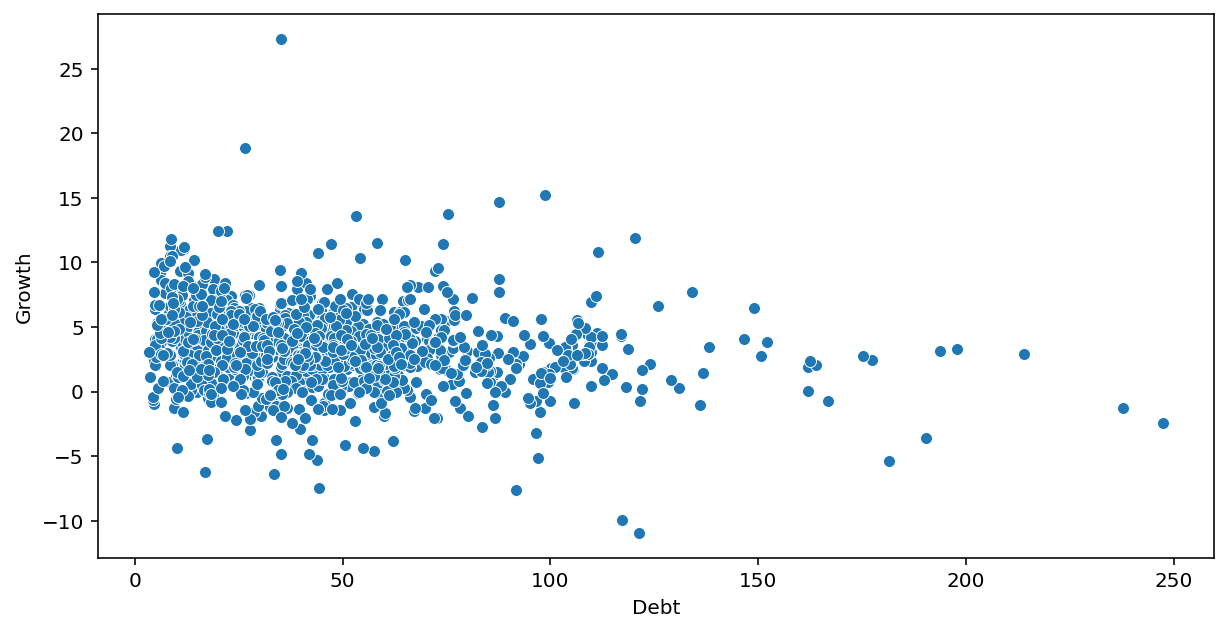

In [15]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot a scatter instead
sns.scatterplot(x="Debt", y="Growth", data=df, ax=ax);

> The 'step' effect is an artefact due to the misrepresentation of the data. So: (i) **Look at your raw data!**, (ii) **Choose a representation adapted to the structure of your data**.

Adapted from the errors from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a> and the critic from https://scienceetonnante.com/2020/04/17/austerite-excel/ (in French) and corresponding GitHub repo: https://github.com/scienceetonnante/Reinhart-Rogoff. 

To see a (serious) critique of this article: <a href="https://www.peri.umass.edu/images/WP322.pdf">Herndon, T., Ash, M., & Pollin, R. (2014). Does high public debt consistently stifle economic growth? A critique of Reinhart and Rogoff. Cambridge journal of economics, 38(2), 257-279.</a>

One figure from the original paper:
<img src="img/RRfig2.png" width="400">

> It is probably possible to do better: this representation leads to misinterpretation!

### (Bad) Example: Systematically using boxplot for showing distribution

#### It can work sometimes

Sometimes = when the distribution is symetric

##### Generate data <a class="tocSkip"></a>

In [16]:
x = np.random.normal(0, 1, 1000)

##### Visualization 1 <a class="tocSkip"></a>

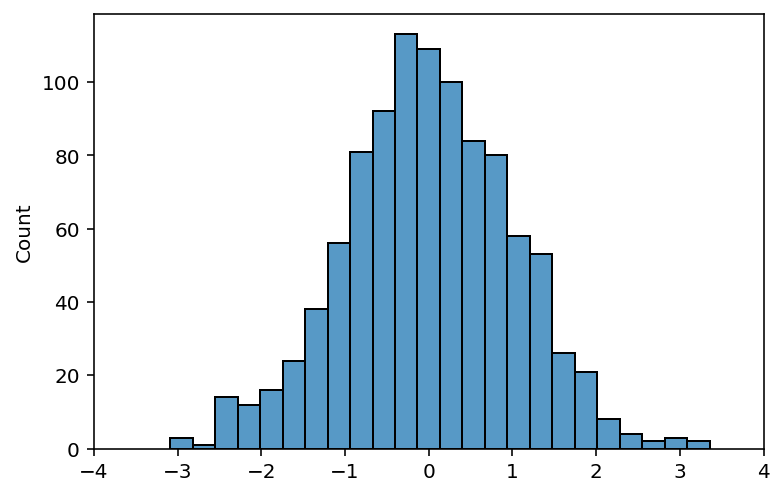

In [17]:
fig, ax = plt.subplots()
sns.histplot(x=x, ax=ax)
ax.set_xlim(-4, 4);

##### Visualization 2 <a class="tocSkip"></a>

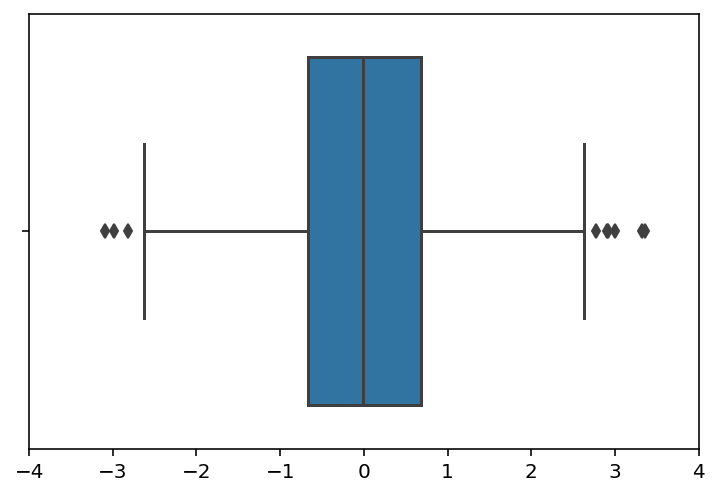

In [18]:
fig, ax = plt.subplots()
sns.boxplot(x=x, ax=ax)
ax.set_xlim(-4, 4);

Here, the boxplot is good means to summarize the information.

#### Penguins flipper length

<img src="img/lec4/penguingraphic.jpg" width="700px">

##### Load data <a class="tocSkip"></a>

This is dataset from the [Seaborn's library](https://github.com/mwaskom/seaborn-data).

In [19]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

We will look at the flipper length.

##### Visualization 1 <a class="tocSkip"></a>

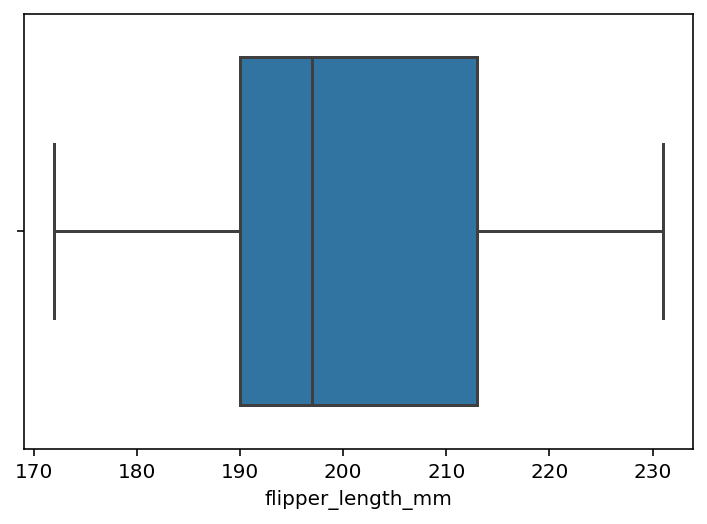

In [23]:
sns.boxplot(data=penguins, x="flipper_length_mm");

##### Visualization 2 <a class="tocSkip"></a>

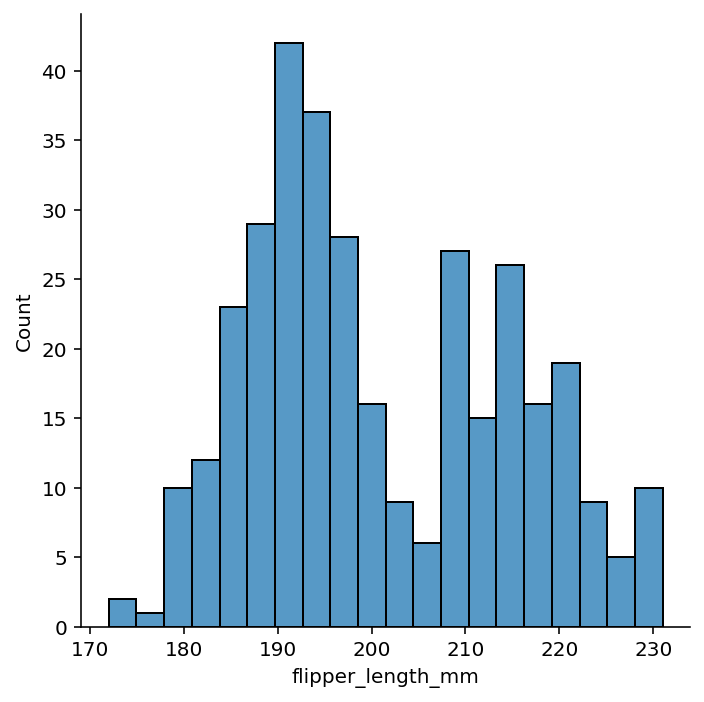

In [24]:
sns.displot(penguins, x="flipper_length_mm", bins=20);

##### Visualization 3 <a class="tocSkip"></a>

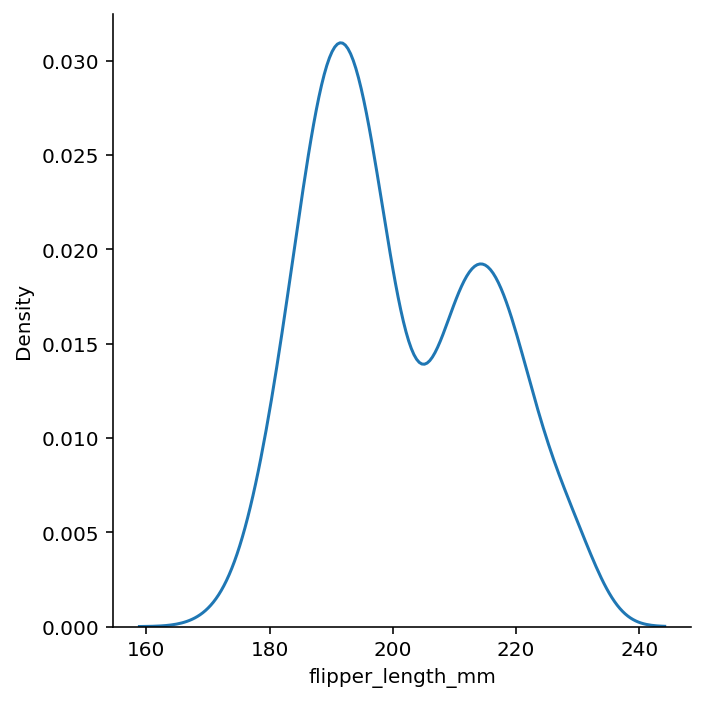

In [25]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

The boxplot (Visualization 1) is here a poor choice of representation, as it hides the asymmetry of the distribution.

#### Salaries

<img src="img/lec4/salaries.png" width="500px" align="left">

Data from <a href="https://catalog.data.gov/ro/dataset/annual-salary-2010-thru-2013">data.gov</a> (U.S. General Services Administration).

> Data represents total calendar year earnings, including base pay and any additional compensation or premiums such as overtime, mileage reimbursement or assignment pay.

##### Load data <a class="tocSkip"></a>

Let's consider the non-zero salaries of the year 2013.

In [26]:
df = pd.read_csv("data_lec4/Annual_Salary_2010_thru_2013.csv")
df

Agency            AgencyTitle             EmployeeName  \
0          165            Accountancy            ASMATH, MOSAR   
1          165            Accountancy         AUBREY, DONALD F   
2          165            Accountancy        BREN, DIANE MARIE   
3          165            Accountancy             CLARK, ROBIN   
4          165            Accountancy       DONOVAN, KIRSTEN M   
...        ...                    ...                      ...   
339758     691  Yakima Valley College          WRIGHT, TERRY D   
339759     691  Yakima Valley College            YBARRA, TOMAS   
339760     691  Yakima Valley College         YOLO, LAURA JEAN   
339761     691  Yakima Valley College  ZAVALA, DIANN CHRISTINE   
339762     691  Yakima Valley College        ZONTEK, KENNETH S   

                          JobTitle  Salary2010  Salary2011  Salary2012  \
0        FORMS & RECORDS ANALYST 2           0           0           0   
1                     BOARD MEMBER           0         950        1450   
2                       WMS BAND 3       15004           0           0   
3                     BOARD MEMBER         550           0           0   
4         ADMINISTRATIVE TRAINEE 3           0           0           0   
...                            ...         ...         ...         ...   
339758                     FACULTY        5706       17118       15692   
339759  VICE PRES-INSTR & STU SERV      100989       99601       97960   
339760         PROGRAM COORDINATOR           0           0           0   
339761                     FACULTY        6340        3804           0   
339762                     FACULTY       64009       60356       10968   

        Salary2013  
0            32272  
1                0  
2                0  
3                0  
4            15182  
...            ...  
339758       12839  
339759      100506  
339760       29531  
339761           0  
339762       53340  

[339763 rows x 8 columns]

In [27]:
# Don't take into account the zeros that seems to stand for 'missing value'
df=df[df.Salary2013 > 0]

##### Visualization 1 <a class="tocSkip"></a>

<AxesSubplot:xlabel='Salary2013'>

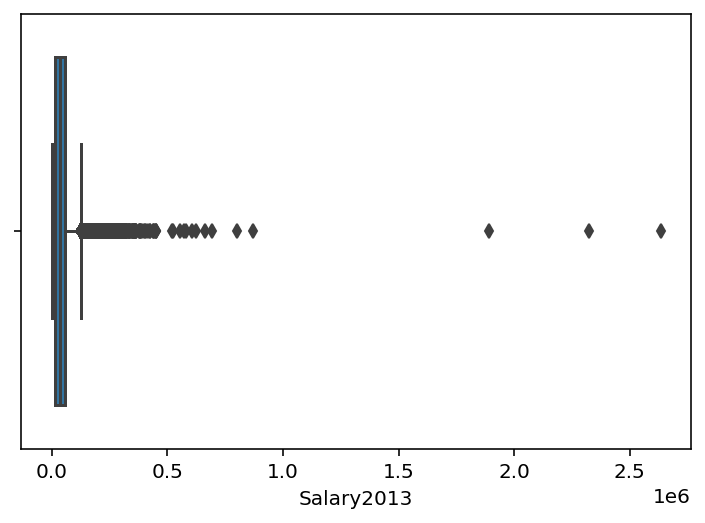

In [28]:
sns.boxplot(data=df, x="Salary2013")

(20.0, 150000.0)

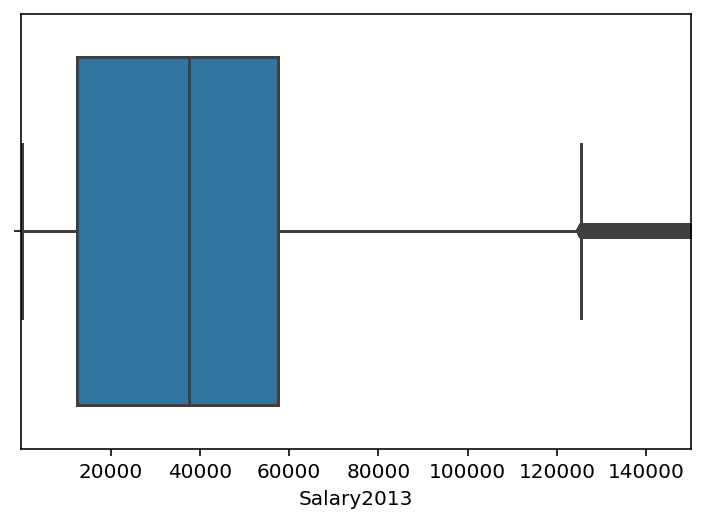

In [29]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="Salary2013", ax=ax)
ax.set_xlim(20, 150000)

##### Visualization 2 <a class="tocSkip"></a>

(100.0, 100000.0)

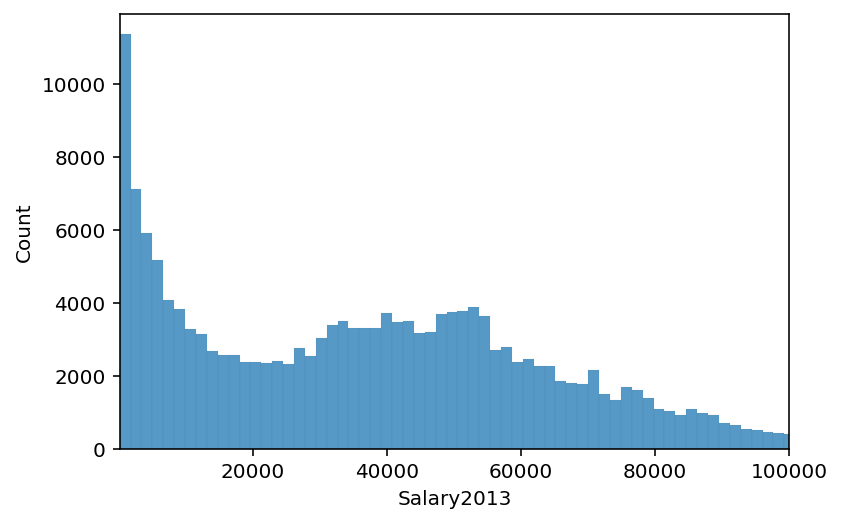

In [30]:
fig, ax = plt.subplots()
sns.histplot(df.Salary2013[df.Salary2013 > 0], ax=ax)
ax.set_xlim(100, 100000)

The box plot **hides the asymmetry** of the distribution. It gives the wrong impression that salaries are centered around the median.

## *Alles ist relativ* (Everything is relative)

<img src="img/lec4/einstein.jpg" width="300px">

...especially human perception.

<div class="alert alert-block alert-info">

**Visual elements are perceived relatively to each other**. Be careful to no induce misinterpretations by ignoring this fact.
</div>

### The circle example

Example adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>)

In [31]:
def plot_circle_barplot(values):
    fig, axes = plt.subplots(figsize=(18,8), ncols=2)

    ax = axes[0]
    ax.set_aspect(1)
    
    max_value = max(values)

    x, y = 0.0, 0.5
    for value in values:
        r1 = .5* (value / max_value)
        r2 = .5* (np.sqrt(value/np.pi))/(np.sqrt(max_value/np.pi))
        ax.add_artist(plt.Circle( (x+r2,y), r1, color='r'))
        ax.add_artist(plt.Circle( (x+r2,1.5+y), r2, color='k'))
        fontsize = 2*value
        x += 2*r2 + 0.05
        
    ax.axhline(1.25, c='k')
    ax.text(0.0, 1.25+0.05, "Relative size using disc area",
             ha="left", va="bottom",color=".25")
    ax.text(0.0, 1.25-0.05, "Relative size using disc radius",
             ha="left", va="top",color=".25")
    ax.set_xlim(-0.05, 3.5)
    ax.set_ylim(-0.05, 2.6)
    ax.axis('off');

    ax = axes[1]
    # ax.set_aspect(0.1)

    sns.set_style("whitegrid")
    ax.bar(x=np.arange(len(values)), height=values)
    ax.set_xticks([])
    plt.show()

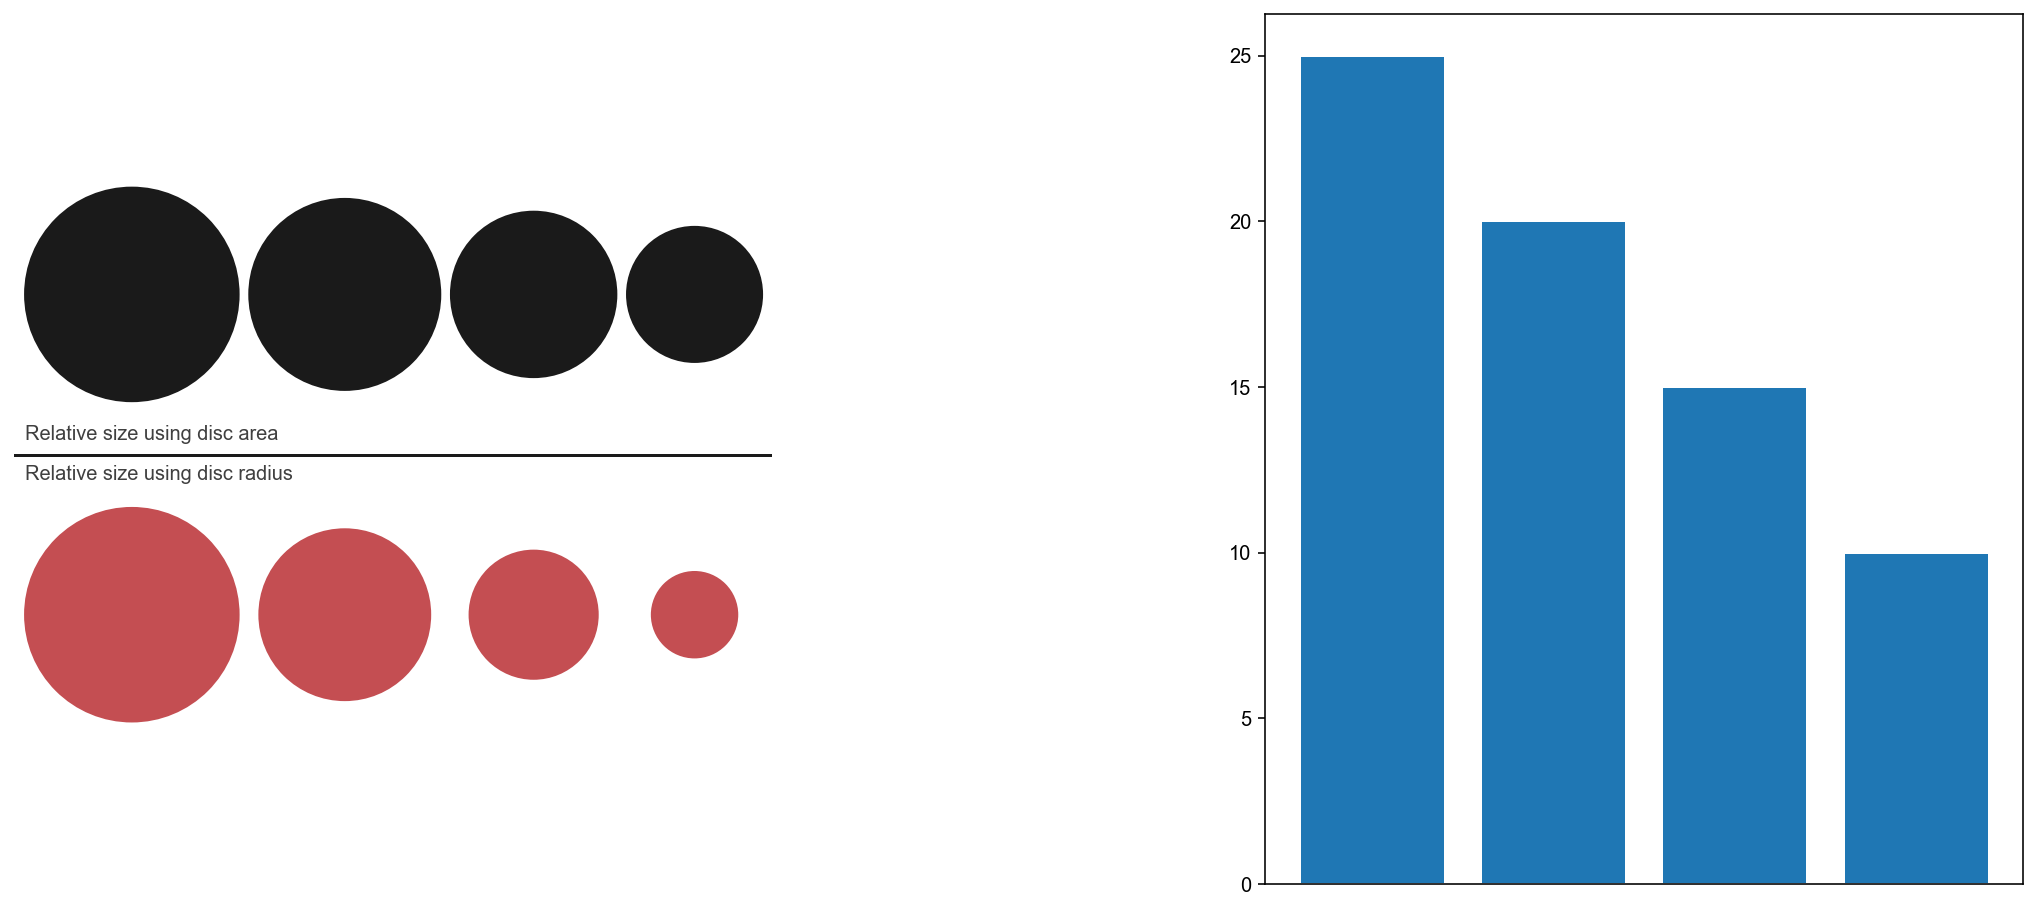

In [32]:
plot_circle_barplot([25.,20.,15.,10.])

Deciding to use either the disc area or disc radius has consequences: make sure to not mislead your reader by either suggesting that there is almost no difference while the difference is still substantial, or that there is a large difference while the difference is actually tiny.

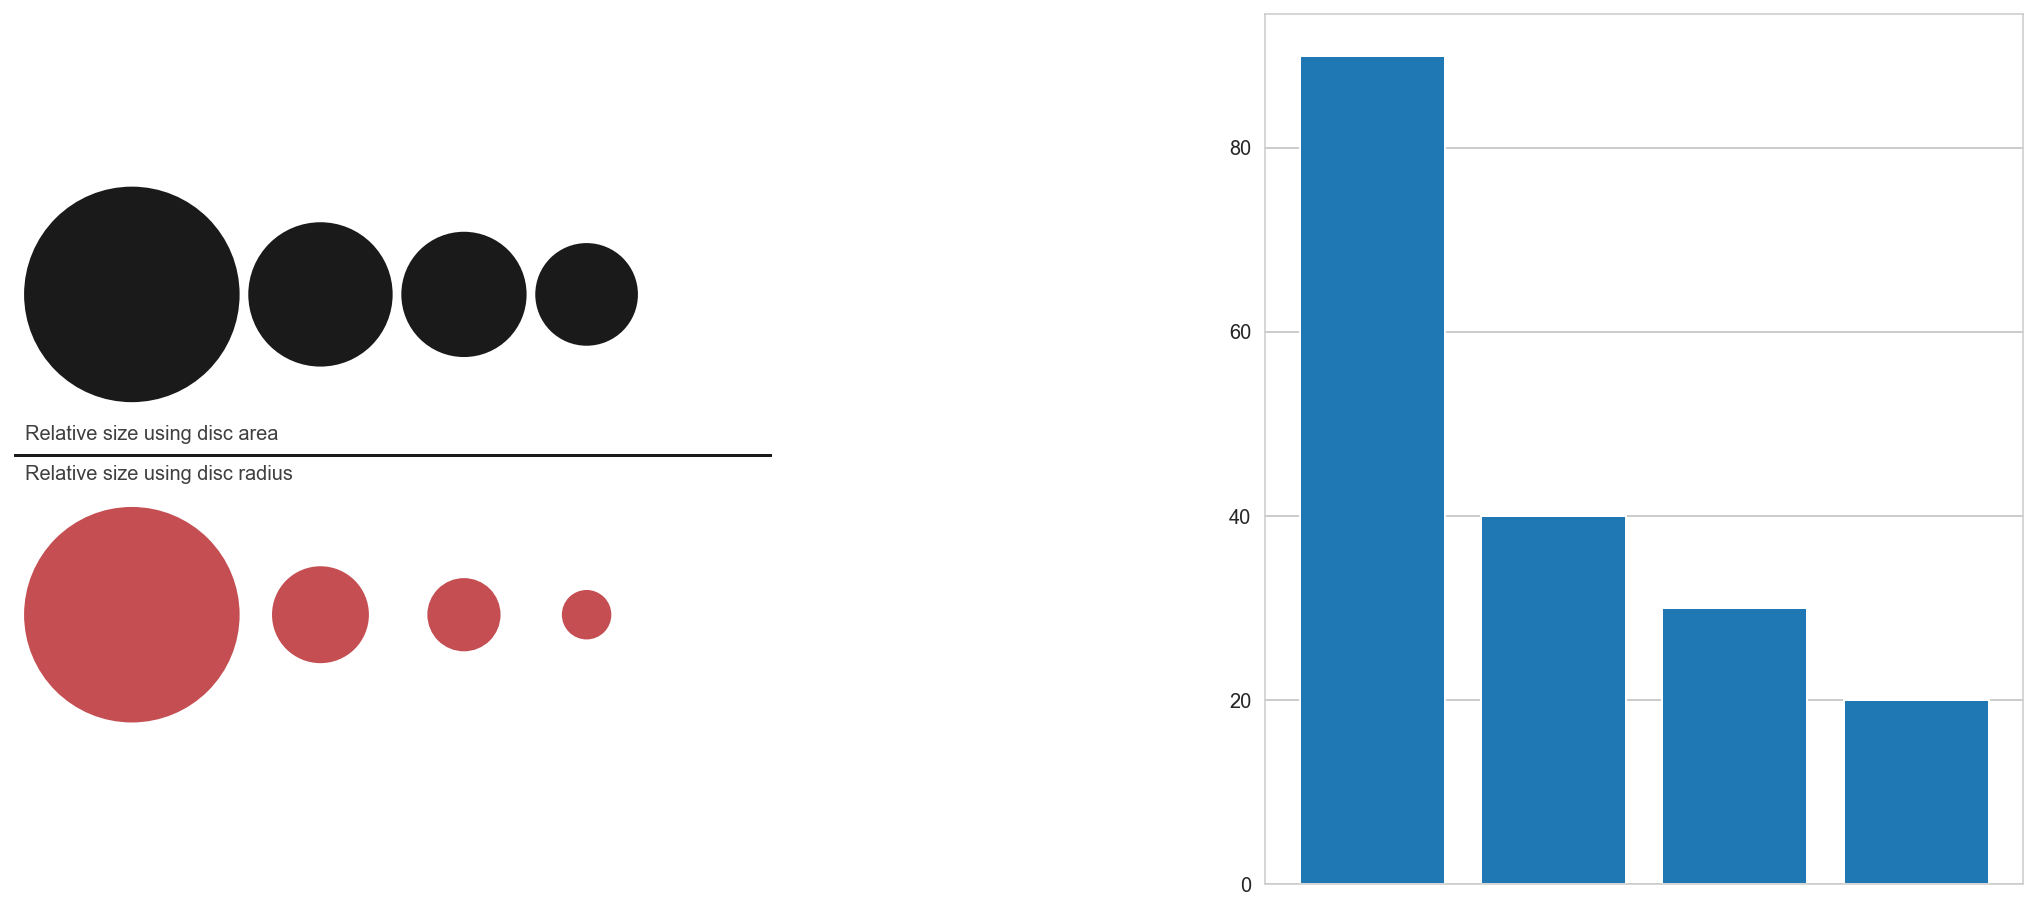

In [33]:
plot_circle_barplot([90, 40, 30, 20])

### The bar example

#### Example 1: abstract

Example adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>)

##### Generate data <a class="tocSkip"></a>

In [34]:
n = 10
np.random.seed(123)
height = 5*np.random.uniform(.75,.85,n)

##### Visualization 1 <a class="tocSkip"></a>

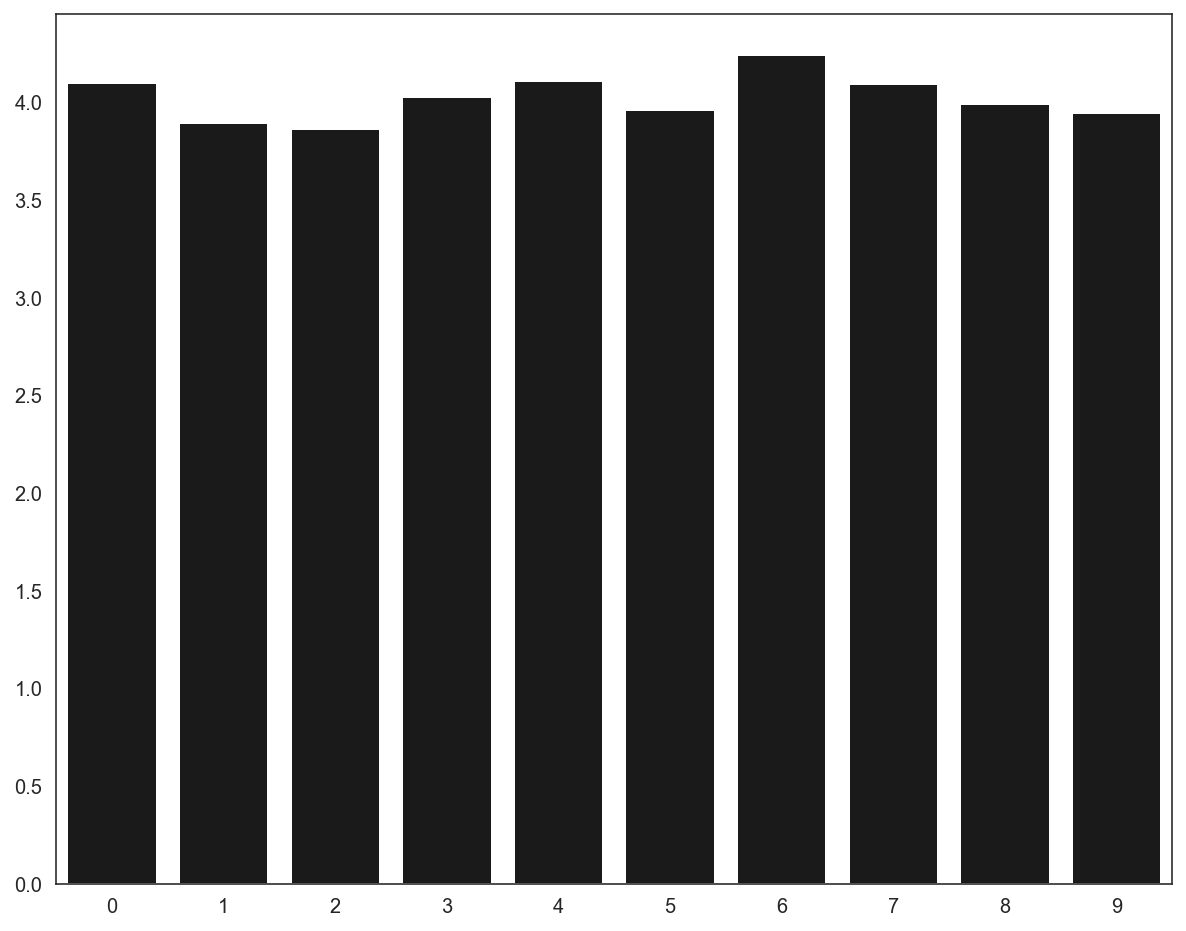

In [35]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=np.arange(len(height)), y=height, color='k', ax=ax);

##### Visualization 2 <a class="tocSkip"></a>

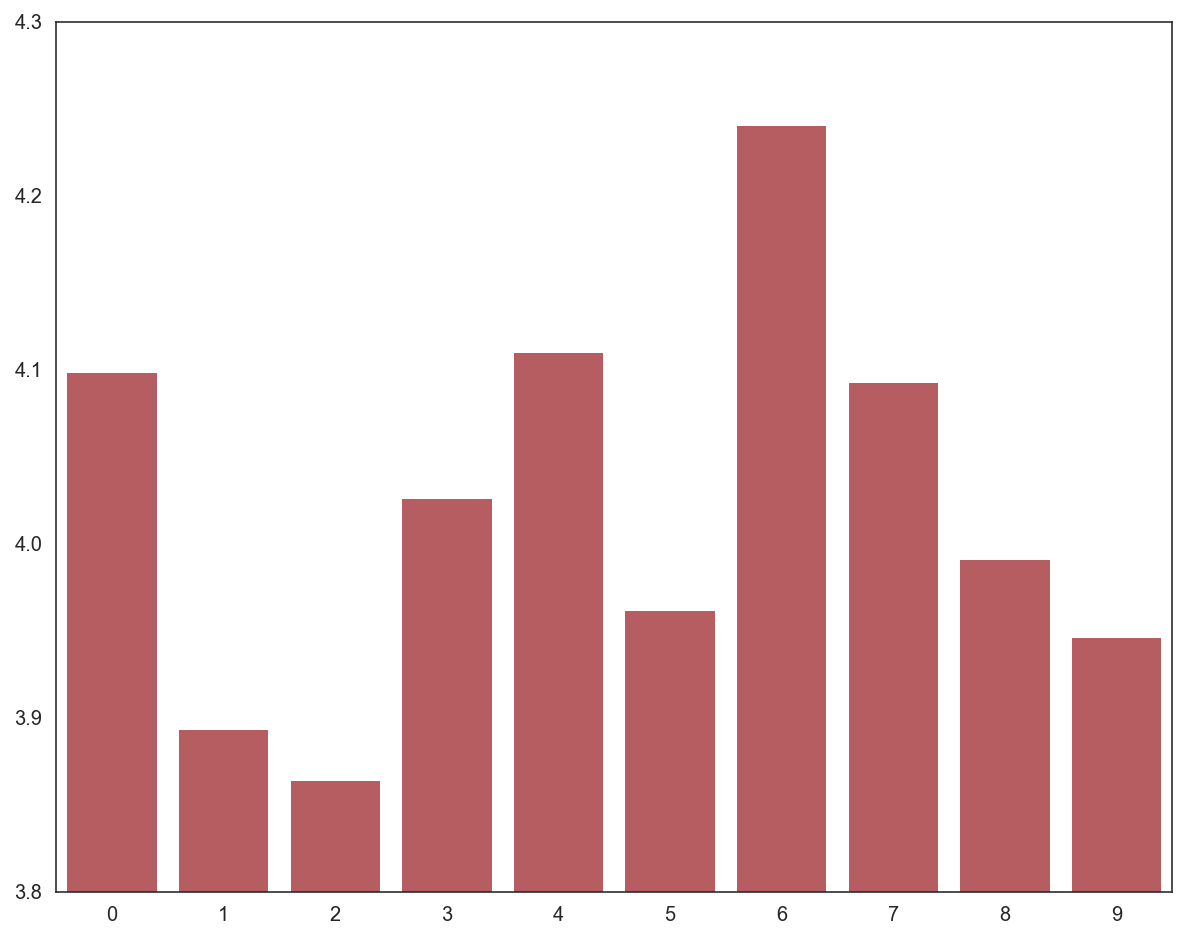

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x=np.arange(len(height)), y=height, alpha=1.0, color='r', ec='None', ax=ax)
ax.set_ylim((3.8, 4.30));

In the second visualization, the differences seem huge compared to the first visualization, while it is the same data.

Note that errors bars could help here, if available (see next subsection)!

#### Example 2: Companies Revenues

Example adapted from [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py), initially for a different purpose (explaining the "lifecycle of a plot").

##### Load data <a class="tocSkip"></a>

In [37]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

##### Visualize data <a class="tocSkip"></a>

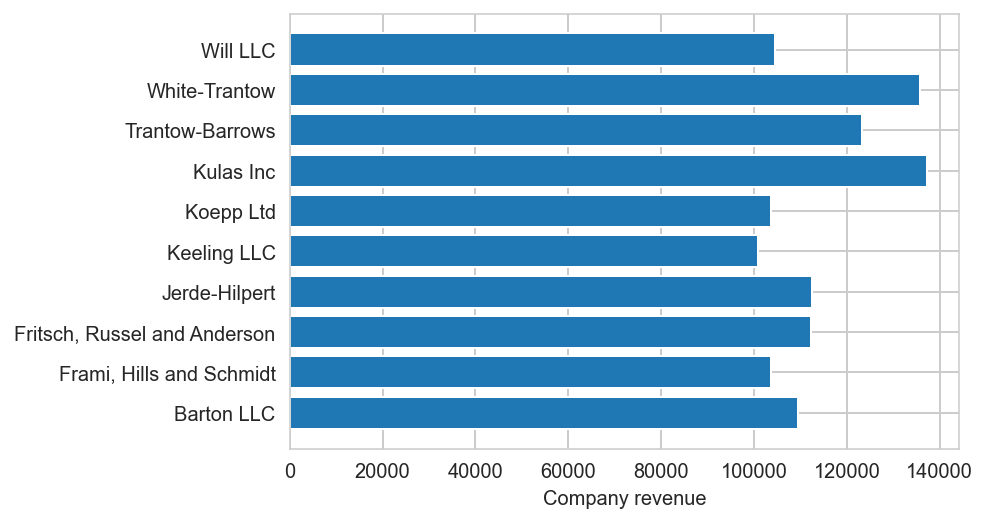

In [38]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
ax.set_xlabel("Company revenue");

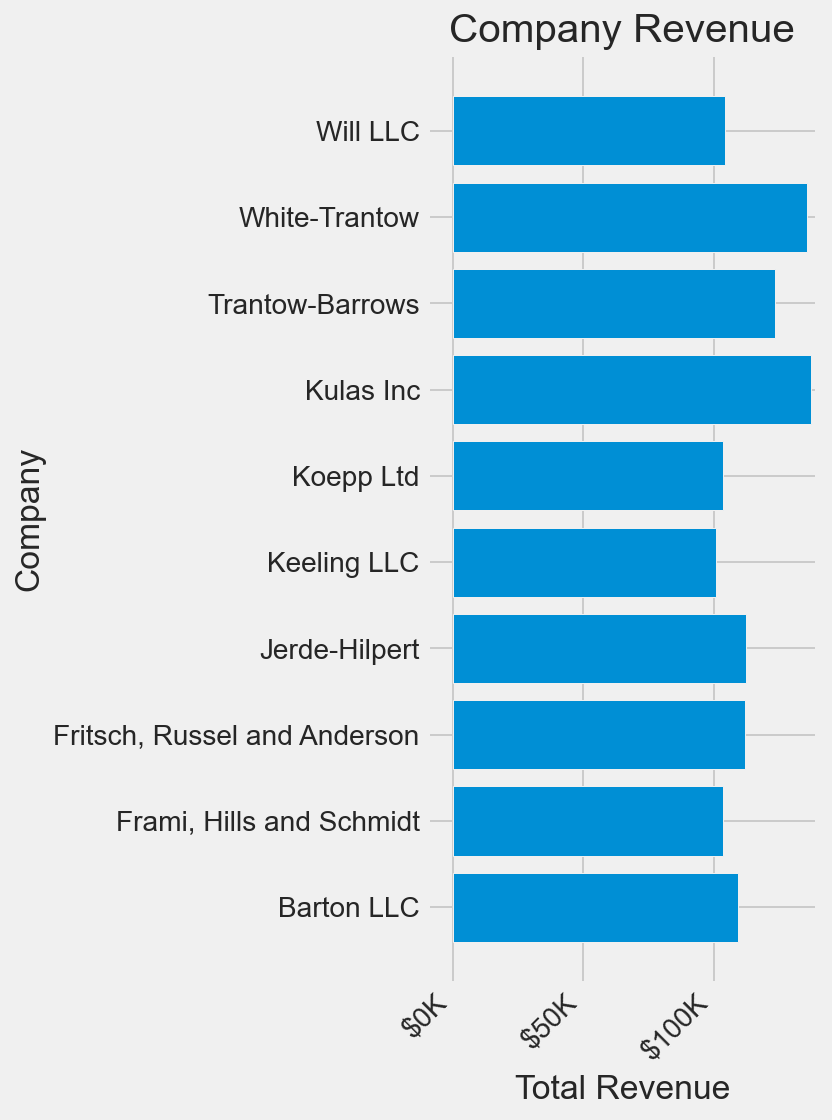

In [39]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

Note that the differences seem more important in the first graph than in the second.

## Do give an indication of the underlying data dispersion

<div class="alert alert-block alert-info">

**The dispersion of the data** is important to correctly **evaluate a difference**. Otherwise, you can easily suggest that there is a huge difference when there is not.
</div>

### Basic example

#### Generate data <a class="tocSkip"></a>

In [40]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
mu_A = 150.0
mu_B = 200.0

small_sd = 10.0
large_sd = 50.0

n = 100

In [41]:
# Create the samples
xA_small_sd = np.random.normal(mu_A, scale=small_sd, size=n)
xB_small_sd = np.random.normal(mu_B, scale=small_sd, size=n)

dataset_small_sd = pd.DataFrame({"xA": xA_small_sd, "xB": xB_small_sd})
dataset_small_sd

xA          xB
0   150.505617  207.382471
1   154.999513  206.507532
2   140.040911  206.147406
3   156.935985  198.734314
4   145.816985  215.788742
..         ...         ...
95  155.232477  200.494765
96  145.041815  197.386880
97  148.285354  208.767425
98  140.556314  195.171213
99  152.808647  190.145815

[100 rows x 2 columns]

In [42]:
xA_large_sd = np.random.normal(mu_A, scale=large_sd, size=n)
xB_large_sd = np.random.normal(mu_B, scale=large_sd, size=n)

dataset_large_sd = pd.DataFrame({"xA": xA_large_sd, "xB": xB_large_sd})
dataset_large_sd

xA          xB
0   126.366859  259.725813
1   154.813397  175.063964
2   211.460670  195.963019
3   229.993876  296.893570
4   130.029286  230.441861
..         ...         ...
95  150.622999  197.350895
96  136.217769  195.110524
97  181.625723  250.307499
98  194.219391  222.716143
99  214.118368  179.276312

[100 rows x 2 columns]

#### Visualize the data <a class="tocSkip"></a>

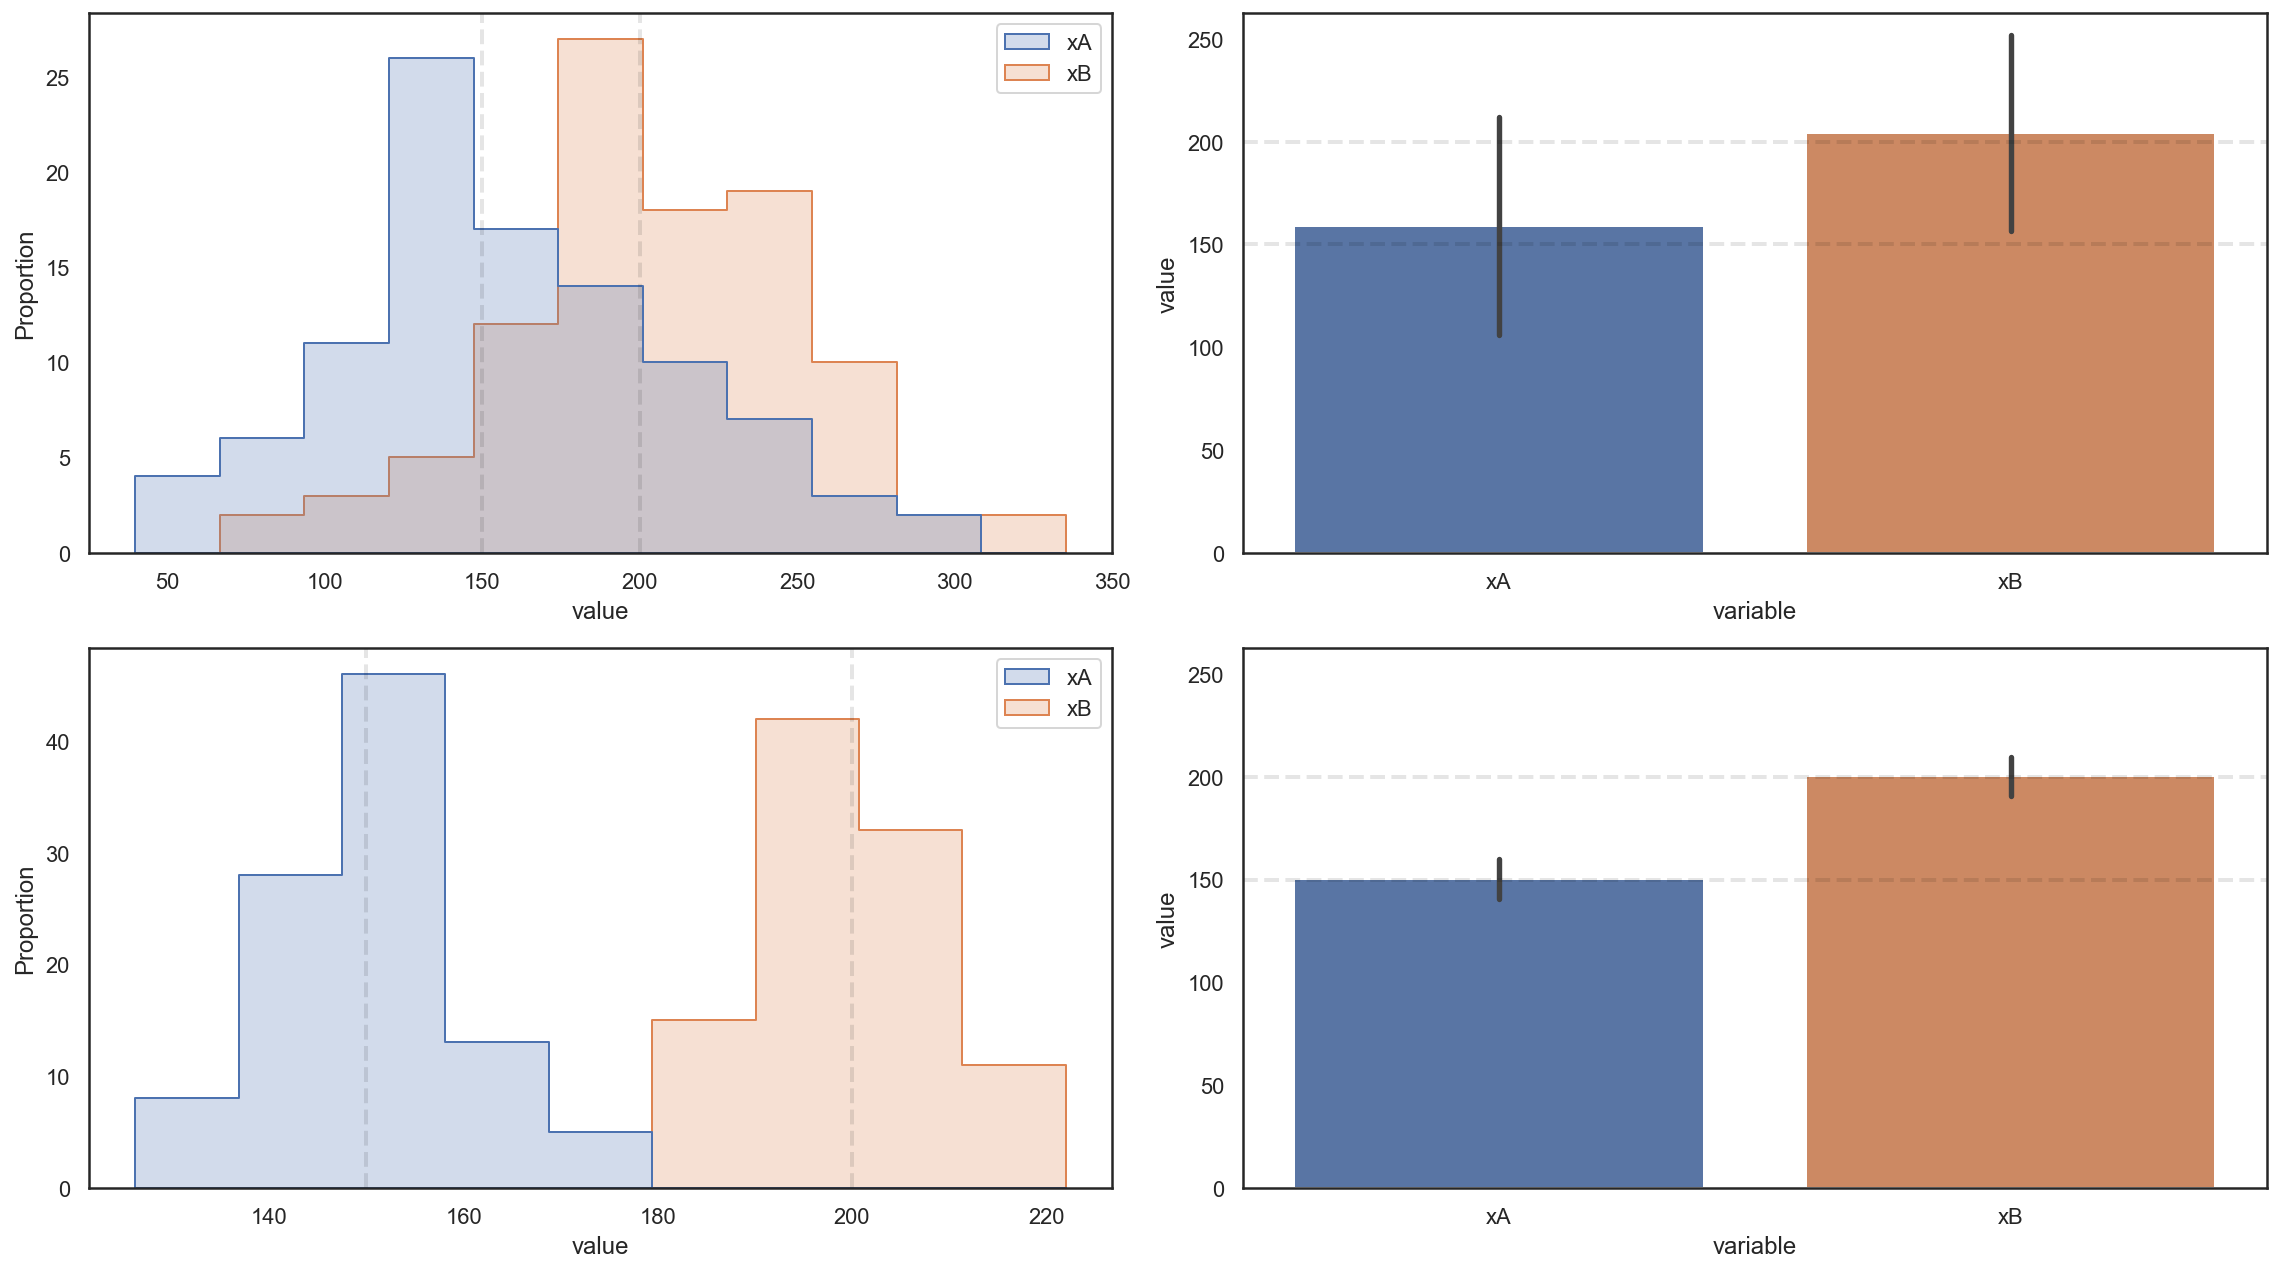

In [43]:
sns.set_theme("notebook", style="white")

# Create figure and axes
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

# For each dataset (containing each two samples)
datasets = dataset_large_sd, dataset_small_sd
for i in range(len(datasets)):
    
    # Get data
    df = datasets[i]

    # Create histograms
    ax = axes[i, 0]
    sns.histplot(data=df, ax=ax, kde=False, element="step")
    
    # Plot the theoretical mean
    ax.axvline(mu_A, ls='--', color='black', alpha=0.1, lw=2)
    ax.axvline(mu_B, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the axis lables
    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    # Create a barplot
    ax = axes[i, 1]
    df = df.melt()
    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")
    
    # Add horizontal lines representing the means
    ax.axhline(mu_A, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mu_B, ls='--', color='black', alpha=0.1, lw=2)
    
    # Set the y limits
    ax.set_ylim(0, max(mu_A, mu_B) + large_sd * 1.25)

plt.tight_layout()
plt.show()

> The difference of means are identical but the dispersions are different. In one case, it seems adequate to consider that there is a difference between $X$ and $Y$, while it is not that evident in the other. **Always look at the dispersion** (STD/variance)!

### One bad example

Remember this figure from  the <a href="https://www.nature.com/articles/365611a0"> Mozart effect's paper</a>:

<img src="img/mozart.png" width="300">

## Do NOT forget textual information

Do not forget to add an adequate title, axis labels, legend, and caption

<img src="img/lec4/graph_anatomy.png" width="800px">

<img src="img/lec4/figurelegend.png" width="800px">

Figures from <a href="https://www.clips.edu.au/displaying-data/">CLIPS (University of Queensland)</a>.

# Transmit the message efficiently

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left"><a class="tocSkip"></a>&nbsp;Important</h2>
    
<b>Graphical properties</b> of your figures will greatly impact the <b>readability of the underlying message</b>.
</div>

## Do NOT trust the default options

<div class="alert alert-block alert-info">

Often, the <b>default options</b> are terribly bad.
</div>

Let's use one 'toy' dataset (from <a href="http://sthda.com/english/wiki/r-built-in-data-sets">R built-in datasets</a>).

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Description of variables:

`mpg`: Miles/(US) gallon

`cyl`: Number of cylinders

`disp`: Displacement (cu.in.)

`hp`: Gross horsepower

`drat`: Rear axle ratio

`wt`: Weight (1000 lbs)

`qsec`: 1/4 mile time

`vs`: V/S

`am`: Transmission (0 = automatic, 1 = manual)

`gear`: Number of forward gears

`carb`: Number of carburetors

In [44]:
df = pd.read_csv("data_lec4/mt_cars.csv", index_col=0)
df

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE           16.4    8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3    8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2    8  275.8  180  3.07  3.780  18.00   0   0     3   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Chrysler Imperial    14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Toyota Corona        21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
Dodge Challenger     15.5    8  318.0  150  2.76  3.520  16.87   0   0     3   
AMC Javelin          15.2    8  304.0  150  3.15  3.435  17.30   0   0     3   
Camaro Z28           13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Porsche 914-2        26.0    4  120.3   91  4.43  2.140  16.70   0   1     5   
Lotus Europa         30.4    4   95.1  113  3.77  1.513  16.90   1   1     5   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Ferrari Dino         19.7    6  145.0  175  3.62  2.770  15.50   0   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   
Volvo 142E           21.4    4  121.0  109  4.11  2.780  18.60   1   1     4   

                     carb  
Mazda RX4               4  
Mazda RX4 Wag           4  
Datsun 710              1  
Hornet 4 Drive          1  
Hornet Sportabout       2  
Valiant                 1  
Duster 360              4  
Merc 240D               2  
Merc 230                2  
Merc 280                4  
Merc 280C               4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Cadillac Fleetwood      4  
Lincoln Continental     4  
Chrysler Imperial       4  
Fiat 128                1  
Honda Civic             2  
Toyota Corolla          1  
Toyota Corona           1  
Dodge Challenger        2  
AMC Javelin             2  
Camaro Z28              4  
Pontiac Firebird        2  
Fiat X1-9               1  
Porsche 914-2           2  
Lotus Europa            2  
Ford Pantera L          4  
Ferrari Dino            6  
Maserati Bora           8  
Volvo 142E              2

Let's represent the milage per gallon against the weight for each of the $32$ cars.

### Using Matplotlib defaults

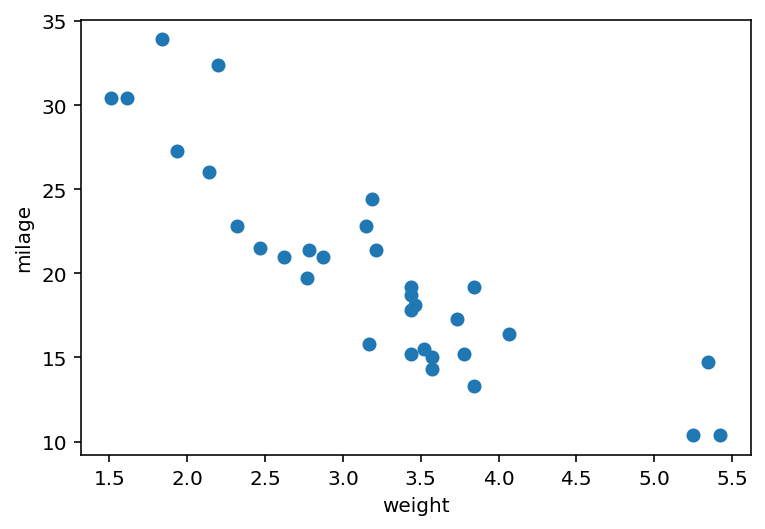

In [45]:
sns.reset_orig()  # Reset to default
fig, ax = plt.subplots()
ax.scatter(df.wt, df.mpg)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

### Using R defaults

<img src="img/lec4/cars_r.png" width="400" align="left">

### Using Matlab defaults

<img src="img/lec4/cars_matlab.png" width="400" align="left">

### Using Excel defaults

<img src="img/lec4/cars_excel.png" width="400" align="left">

### Using Numbers (MacOS) defaults

<img src="img/lec4/cars_numbers.png" width="400" align="left">

### Using Seaborn defaults

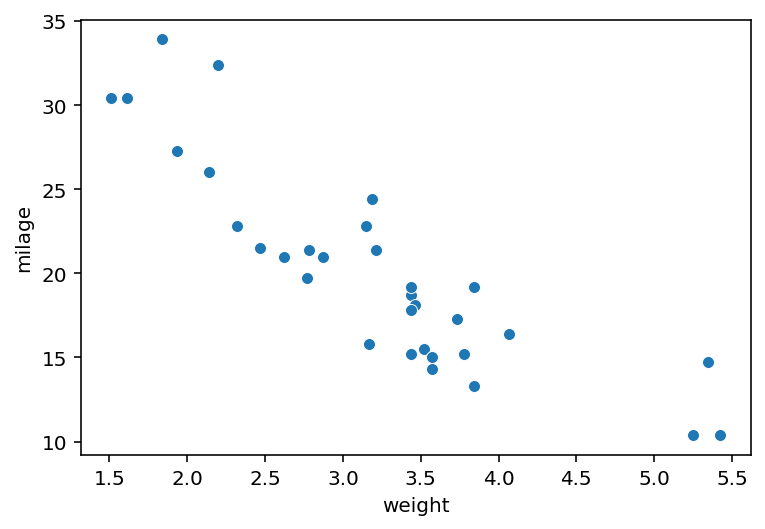

In [46]:
sns.reset_orig()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

However, Seaborn propose several defaults. The more default of the defaults is by calling 
`sns.set()`

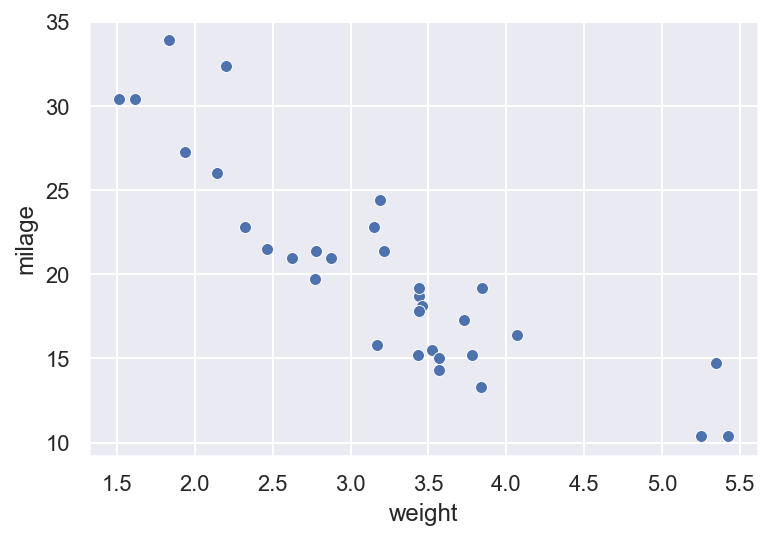

In [47]:
sns.reset_orig()
sns.set()
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

Other 'defaults' can be set by using `sns.set_theme`, choosing a `context` (default is "notebook", alternatives are "paper", "talk", and "poster"), and a `style` (default is "darkgrid", alternatives are "whitegrid", "dark", "white", "ticks").

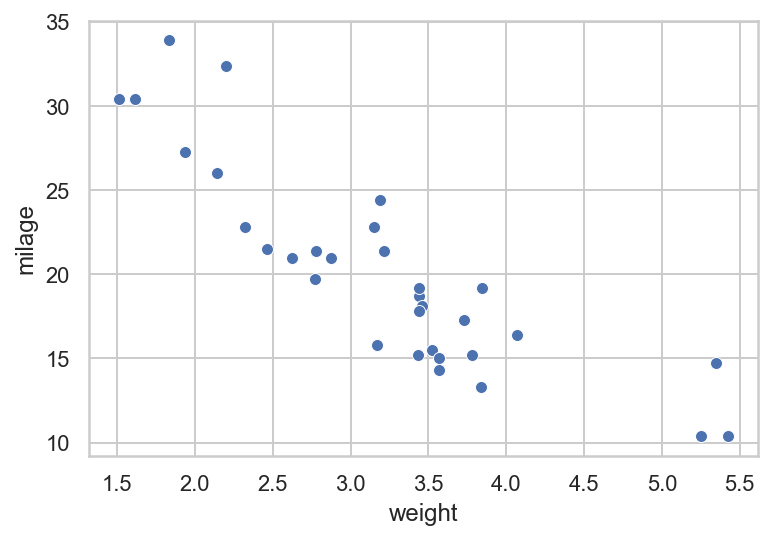

In [48]:
sns.reset_orig()
sns.set_theme(style='whitegrid',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

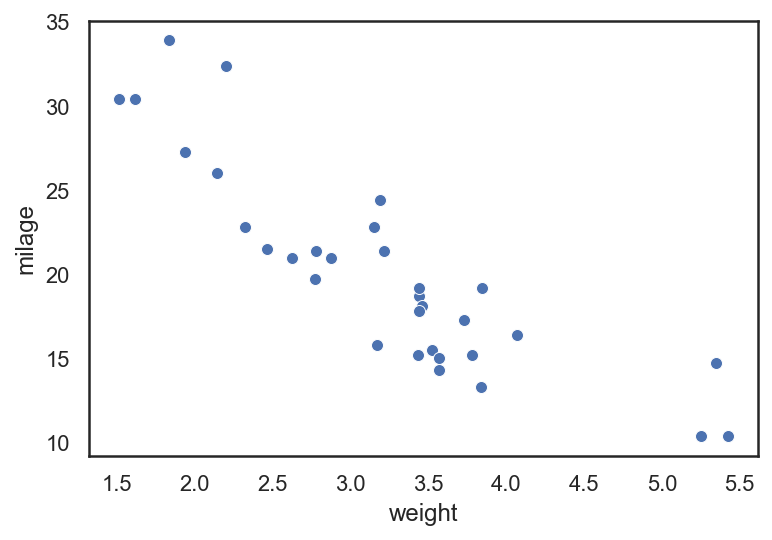

In [49]:
sns.reset_orig()
sns.set_theme(style='white',)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="wt", y="mpg", ax=ax)
ax.set_xlabel("weight")
ax.set_ylabel("milage");

## Do NOT ignore saliency effects

<div class="alert alert-block alert-info">

Human perception is relative: <b>the context</b> will greatly influence <b>the visibility of an object</b>.
</div>

...or pop-out effects

Here are a few examples from Collin Ware's book <a href="https://www.elsevier.com/books/visual-thinking-for-design/ware/978-0-12-370896-0">Visual Thinking for Design</a>, accessible <a href="https://github.com/greenore/cs171-coursework/blob/master/Visual%20Thinking%20for%20Design%20-%20Colin%20Ware.pdf">here</a>.

<img src="img/lec4/popout1.png" width="400px">
<img src="img/lec4/popout2.png" width="400px">
<img src="img/lec4/popout3.png" width="400px">
<img src="img/lec4/popout5.png" width="400px">

This can be used to data visualization (example also from *Visual thinking for design*):

<img src="img/lec4/popout4.png" width="600px">

## Do NOT overload your figures

<div class="alert alert-block alert-info">

Don't forget what is the purpose of your figure. An <b>excessive number of features will harm the readability of your message</b>.
</div>

### Example: Time series

#### Generate data <a class="tocSkip"></a>

In [50]:
np.random.seed(0)

p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

data = np.concatenate((np.atleast_2d(X), Y), axis=0).T
columns = ["X", ] + [f"Y{i+1}" for i in range(p) ]
df = pd.DataFrame(data=data, columns=columns)
df

X        Y1        Y2        Y3        Y4        Y5        Y6  \
0   0.000000 -0.063983 -0.179812 -0.504272 -0.016859  0.075217  0.121786   
1   0.064516  0.143987 -0.039458 -0.289094 -0.724866 -0.387403 -0.183072   
2   0.129032  0.003454 -0.726513  0.276242  0.286175  0.022519  0.152569   
3   0.193548 -0.068896  0.022044 -0.628623 -0.744131 -0.214039  0.332978   
4   0.258065 -0.220432  0.015120  0.297431  0.097271 -0.580657  0.469402   
5   0.322581  0.057368  0.021167 -0.629877 -0.412490 -0.377147  0.319754   
6   0.387097 -0.203016  0.429685  0.470574  0.168993 -0.037544 -0.735357   
7   0.451613  0.364716  0.102275 -0.164186  0.452736 -0.011409 -0.300027   
8   0.516129  0.454578 -0.300615  0.470951 -0.439059 -0.032093  0.162488   
9   0.580645 -0.270698 -0.203710  0.006057 -0.029803  0.066501 -0.535463   
10  0.645161  0.239656  0.122039  0.174079 -0.009948  0.065129 -0.098704   
11  0.709677 -0.088881 -0.674718 -0.701015 -0.034685 -0.210727 -0.682078   
12  0.774194 -0.039944  0.083458 -0.396491 -0.471148  0.370683 -0.500004   
13  0.838710  0.406996  0.088297 -0.599754  0.440936 -0.290548 -0.726848   
14  0.903226 -0.661205 -0.487022 -0.379825 -0.191093 -0.205169  0.242122   
15  0.967742 -0.641088 -0.588842 -0.601590  0.308011  0.364904 -0.470094   
16  1.032258 -0.724727 -0.355715 -0.352521  0.124349  0.257742 -0.318310   
17  1.096774  0.290775 -0.295362 -0.232171 -0.378204  0.129861  0.410102   
18  1.161290  0.222696 -0.037254 -0.669816  0.267247 -0.624716  0.130518   
19  1.225806  0.337515 -0.201748  0.115590 -0.254368  0.399353 -0.710201   
20  1.290323  0.473273  0.485467 -0.041748  0.351379  0.142802 -0.544132   
21  1.354839  0.248948 -0.622444 -0.418263 -0.023409  0.498559  0.026848   
22  1.419355 -0.173151 -0.488904 -0.095940  0.352169 -0.563190 -0.028464   
23  1.483871  0.225661 -0.548363 -0.632574  0.115664  0.335158 -0.452634   
24  1.548387 -0.602157  0.066385 -0.030067  0.156568 -0.546884  0.417767   
25  1.612903  0.049901 -0.433385  0.411620 -0.123345  0.019449  0.017457   
26  1.677419 -0.570808 -0.167112 -0.351789  0.445105 -0.595225 -0.080459   
27  1.741935  0.430836 -0.444468  0.084263  0.054988  0.310010 -0.012613   
28  1.806452 -0.097690 -0.551288 -0.585253 -0.220181  0.259149  0.162653   
29  1.870968 -0.231673 -0.612031  0.145409  0.007992 -0.038624 -0.360069   
30  1.935484 -0.419305  0.070412 -0.388242 -0.726009 -0.241021 -0.252224   
31  2.000000  0.217792 -0.577271 -0.521011 -0.373031 -0.663541 -0.487695   

          Y7  
0  -0.517259  
1   0.430465  
2   0.174438  
3  -0.136926  
4  -0.465732  
5  -0.432054  
6  -0.677464  
7  -0.206979  
8  -0.360255  
9   0.120429  
10 -0.277810  
11 -0.525495  
12 -0.719152  
13 -0.665938  
14  0.099241  
15 -0.182879  
16 -0.079276  
17  0.370839  
18  0.487924  
19 -0.478879  
20  0.078848  
21 -0.420847  
22 -0.724186  
23  0.197973  
24 -0.349979  
25 -0.270670  
26 -0.014604  
27  0.288811  
28  0.036227  
29  0.340813  
30 -0.408072  
31  0.247559

#### Visualization 1 <a class="tocSkip"></a>

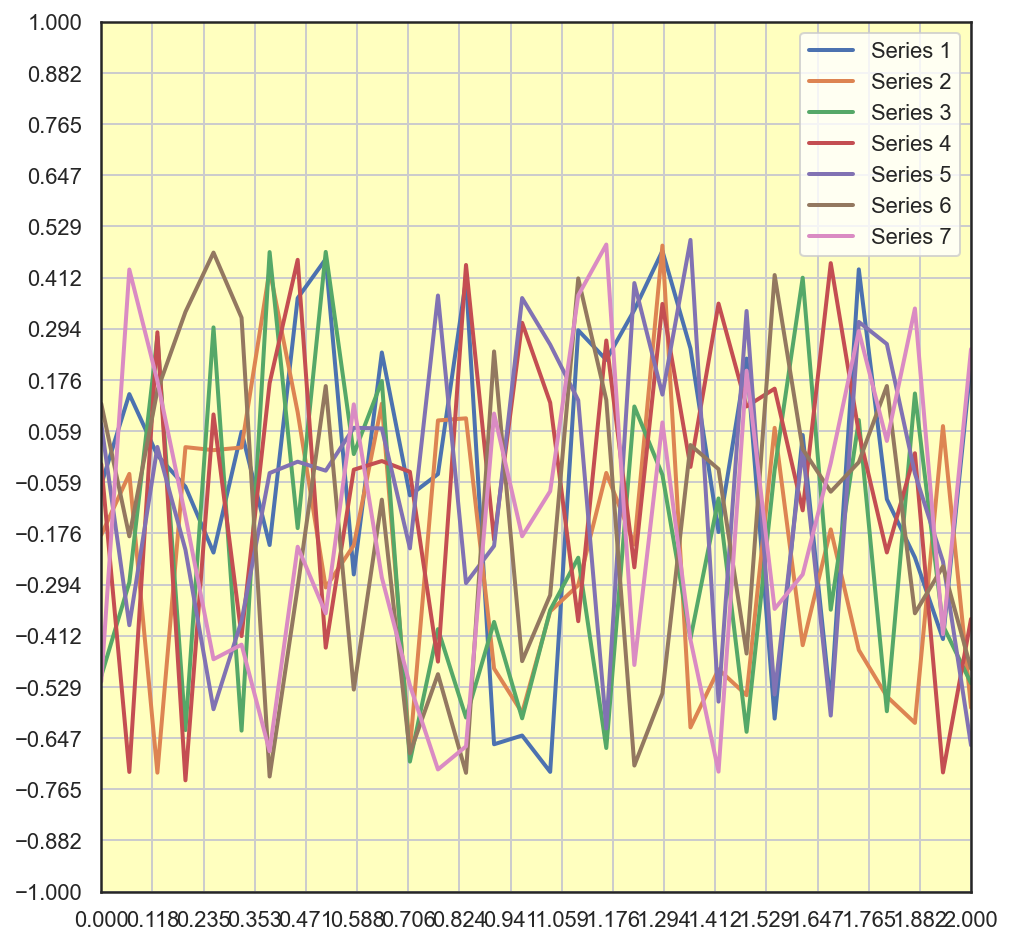

In [51]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(20,8))

# Make it square
ax.set_aspect(1)

# Add a wonderful yellow background color
ax.patch.set_facecolor((1,1,.75))

# Make lines
for i in range(p):
    plt.plot(X, Y[i], label=f"Series {1+i}", lw=2)

# Set axis limits
ax.set_xlim( 0,2)
ax.set_ylim(-1,1)

# Add (a lot of) ticks
ax.set_yticks(np.linspace(-1,1,18))
ax.set_xticks(np.linspace(0,2,18))

# Add legend
ax.legend()

# Add grid
ax.grid()

#### Visualization 2 <a class="tocSkip"></a>

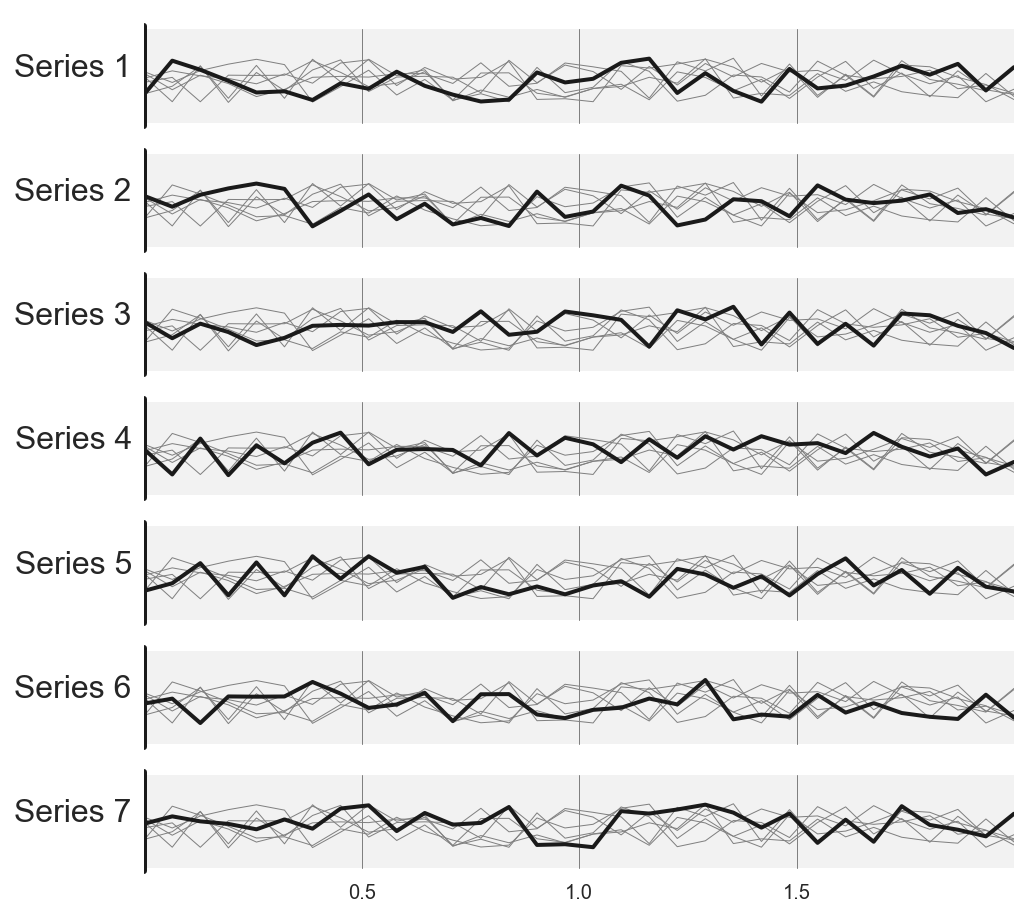

In [52]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(20,8))

# Make it square
ax.set_aspect(1)

# Define coordinates
Yy = p-(np.arange(p)+0.5)
Xx = [p,]*p

# Create grey background
rects = ax.barh(Yy, Xx, align='center', height=0.75, color='.95', ec='None', zorder=-20)

# Set axis limits
ax.set_xlim(0,p)
ax.set_ylim(0,p)

for i in range(p):
    # Put label 
    plt.text(-.1, Yy[i], s=f"Series {1+i}", ha = "right", fontsize=16)
    
    # Add vertical lines
    ax.axvline(0, (Yy[i]-.4)/p, (Yy[i]+.4)/p, c='k', lw=3)
    ax.axvline(.25*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    ax.axvline(.50*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    ax.axvline(.75*p, (Yy[i]-.375)/p, (Yy[i]+.375)/p, c='.5', lw=.5, zorder=-15)
    
    # Make lines
    for j in range(p):
        if i != j:
            ax.plot(X*p/2, i+.5+2*Y[j]/p, c='.5', lw=.5, zorder=-10)
        else:    
            ax.plot(X*p/2, i+.5+2*Y[i]/p, c='k', lw=2)
            
# Add manually text labels
plt.text(.25*p, 0, "0.5", va = "top", ha="center", fontsize=10)
plt.text(.50*p, 0, "1.0", va = "top", ha="center", fontsize=10)
plt.text(.75*p, 0, "1.5", va = "top", ha="center", fontsize=10)

# Remove axis
plt.axis('off');

Here a (non exhaustive) list of the changes to make the figure more light:
<ol>
<li><b>Separate the plot of each series</b> (this is without a doubt the most important) </li>
<li>Remove the ugly background and put instead a very light 4-square grid</li>
<li>Hide the x-ticks (since there is the grid, they are not necessary)</li>
<li><b>Only put a few values on the x-axis</b></li>
<li>Remove the y-axis</li>
<li><b>Play with line width and transparency</b> (more on this next section)</li>
<li>Use a bichromatic palette (two colors only)</li>
<li>Remove the legend and annotate directly the figure (this can be costly in terms of time to implement)</li>
</ol> 

(Bold font indicates the changes I found the most important to improve the readability.)

## Play with transparency and width of the objects

<div class="alert alert-block alert-info">

Playing with <b>transparency</b> and <b>width</b> of the objects is an <b>easy tweak</b> to improve your visuals. 
</div>

### Basic example with a scatter plot

#### Generate data <a class="tocSkip"></a>

In [53]:
np.random.seed(123)

x = np.random.normal(0, 1, size=500)
y = x + np.random.normal(0, 0.5, size=500)

#### Visualization 1 <a class="tocSkip"></a>

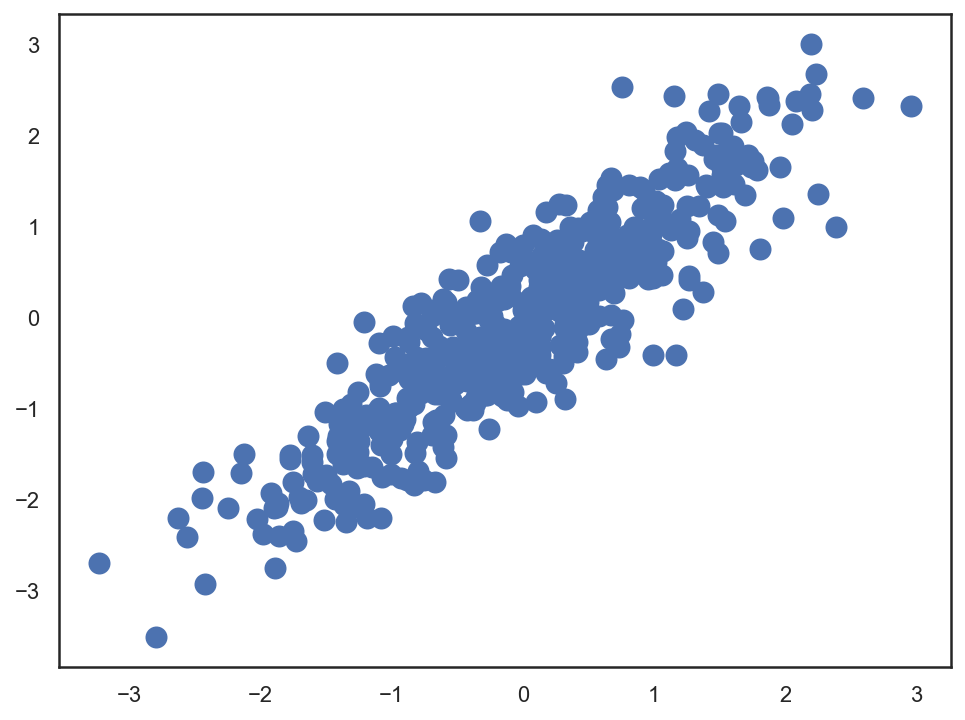

In [54]:
sns.set_theme(context="notebook", style="white")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=100);

#### Visualization 2 <a class="tocSkip"></a>

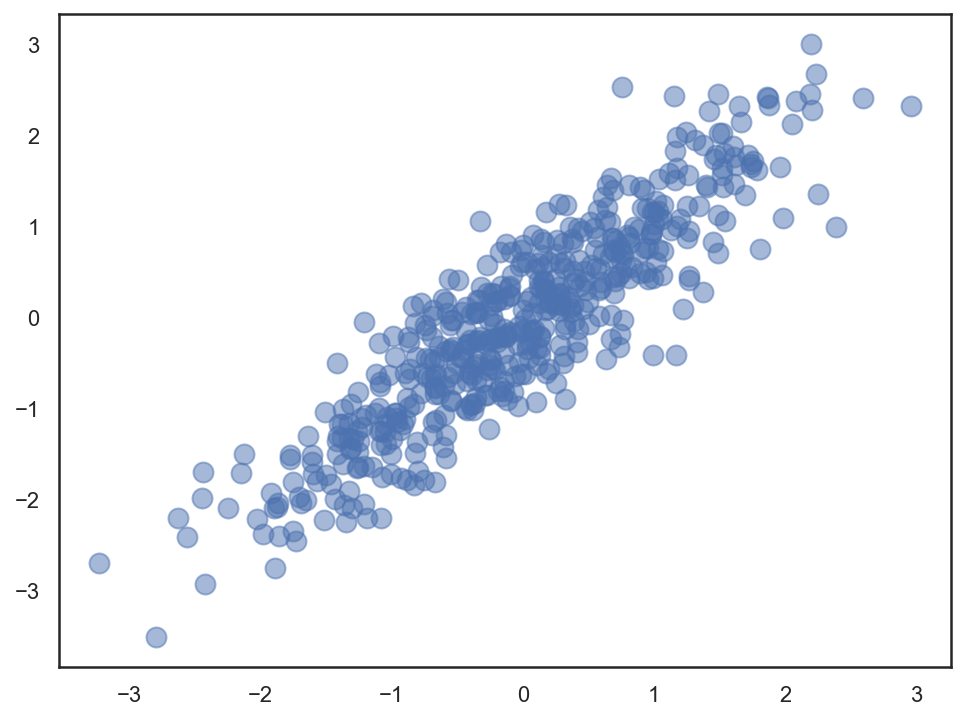

In [55]:
sns.set_theme(context="notebook", style="white")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.5, s=100);

### Time series example

Example inspired from <a href="https://peterroelants.github.io/posts/gaussian-process-tutorial/"> this blog post about Gaussian processes</a>. This is not important for the purpose of this calls to understand what Brownian motion is, but if you want to know a little more about it, here is part of the blog post introduction about Brownian motion:

> An example of a stochastic process that you might have come across is the model of [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) (also known as [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) ). Brownian motion is the random motion of particles suspended in a fluid. It can be seen as a continuous [random walk](https://en.wikipedia.org/wiki/Random_walk) where a particle moves around in the fluid due to other particles randomly bumping into it. We can simulate this process over time $t$ in 1 dimension $d$ by starting out at position 0 and moving the particle over a certain amount of time $\Delta t$ with a random distance $\Delta d$ from the previous position. The random distance is sampled from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $0$ and variance $\Delta t$. Sampling $\Delta d$ from this normal distribution is noted as $\Delta d \sim \mathcal{N}(0, \Delta t)$. The position $d(t)$ at time $t$ evolves as $d(t + \Delta t) = d(t) + \Delta d$.

#### Generate data <a class="tocSkip"></a>

In [56]:
# 1D simulation of the Brownian motion process
total_time = 1
nb_steps = 75
delta_t = total_time / nb_steps
nb_processes = 10  # Simulate different motions
mean = 0.  # Mean of each movement
stdev = np.sqrt(delta_t)  # Standard deviation of each movement
np.random.seed(123)

X = np.arange(0, total_time, delta_t)

# Simulate the brownian motions in a 1D space by cumulatively
#  making a new movement delta_d
Y = np.cumsum(
    # Move randomly from current location to N(0, delta_t)
    np.random.normal(
        mean, stdev, (nb_processes, nb_steps)),
    axis=1)

In [57]:
data = np.concatenate((np.atleast_2d(X), Y), axis=0).T
columns = ["X", ] + [f"Y{i+1}" for i in range(nb_processes) ]
df = pd.DataFrame(data=data, columns=columns)
df

X        Y1        Y2        Y3        Y4        Y5        Y6  \
0   0.000000 -0.125358  0.120057  0.029308 -0.163820  0.088341  0.079764   
1   0.013333 -0.010194  0.073481  0.062070 -0.263752 -0.007382  0.024440   
2   0.026667  0.022481  0.058928 -0.100961 -0.422487 -0.083495  0.066015   
3   0.040000 -0.151451 -0.037780 -0.317683 -0.565364 -0.012928  0.109538   
4   0.053333 -0.218262 -0.223221 -0.435423 -0.551040 -0.029557 -0.019638   
..       ...       ...       ...       ...       ...       ...       ...   
70  0.933333  0.704683  0.410053 -0.725745 -1.640756 -1.053622 -0.552979   
71  0.946667  0.608709  0.462739 -0.789478 -1.424157 -1.121630 -0.698106   
72  0.960000  0.742909  0.641088 -0.817791 -1.376157 -0.991016 -0.667854   
73  0.973333  0.616215  0.613413 -0.859550 -1.357619 -0.975418 -0.479691   
74  0.986667  0.371061  0.629961 -0.749091 -1.262961 -1.115399 -0.472093   

          Y7        Y8        Y9       Y10  
0   0.014940  0.047668  0.131712  0.072552  
1  -0.130846  0.117052  0.040702 -0.112712  
2  -0.292849 -0.013618  0.071329  0.075403  
3  -0.366483  0.065687  0.028342  0.176434  
4  -0.404186  0.133326  0.163974  0.217111  
..       ...       ...       ...       ...  
70  0.486630  1.649836  0.103107  1.198183  
71  0.402786  1.577018 -0.068014  1.299961  
72  0.334621  1.416010  0.072868  1.402434  
73  0.294441  1.521398  0.024793  1.317858  
74  0.242665  1.374339  0.029200  1.462983  

[75 rows x 11 columns]

#### Visualization 1 <a class="tocSkip"></a>

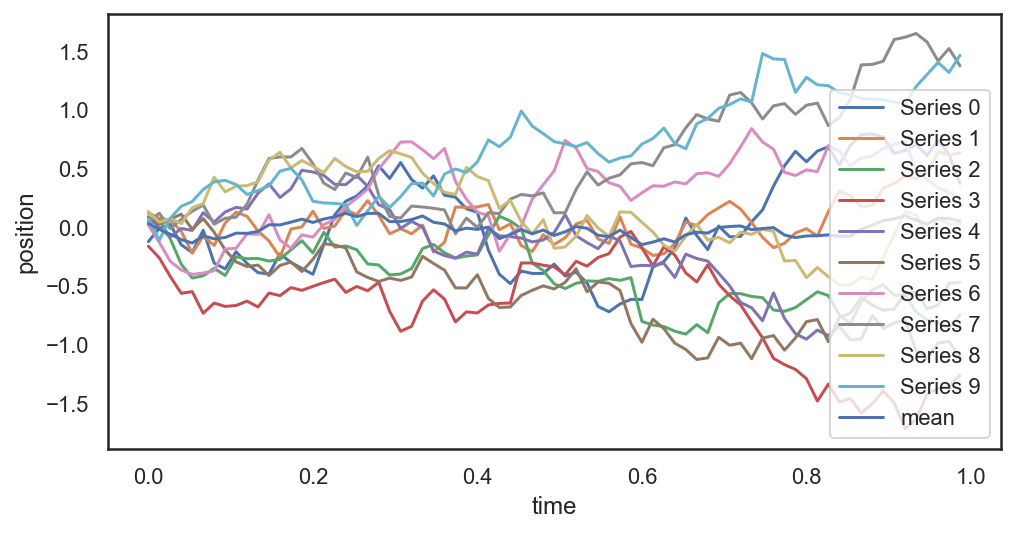

In [58]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], label=f"Series {i}")

ax.plot(X, Y.mean(axis=0), label="mean")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

#### Visualization 2 <a class="tocSkip"></a>

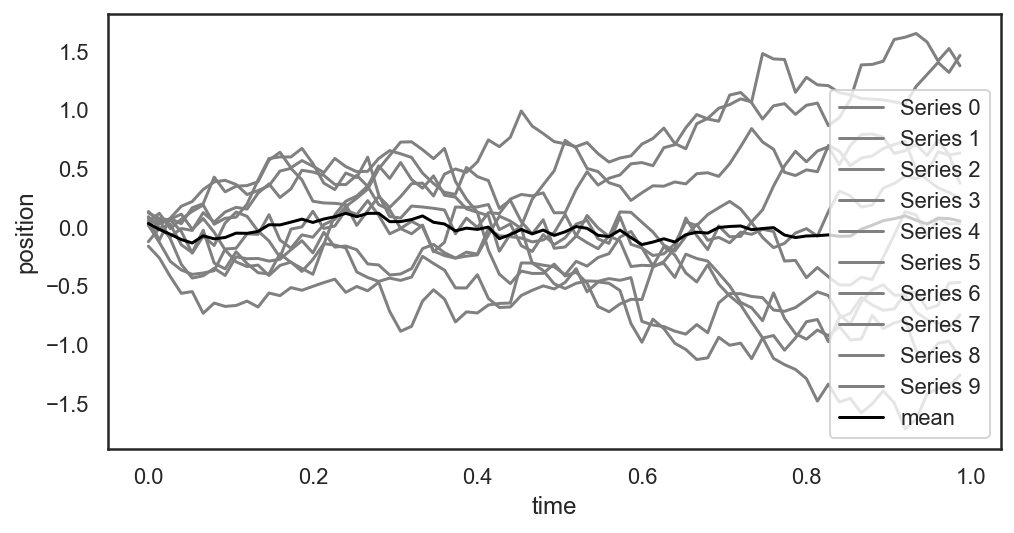

In [59]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], label=f"Series {i}", color='.5')

ax.plot(X, Y.mean(axis=0), label="mean", color="black")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

#### Visualization 3 <a class="tocSkip"></a>

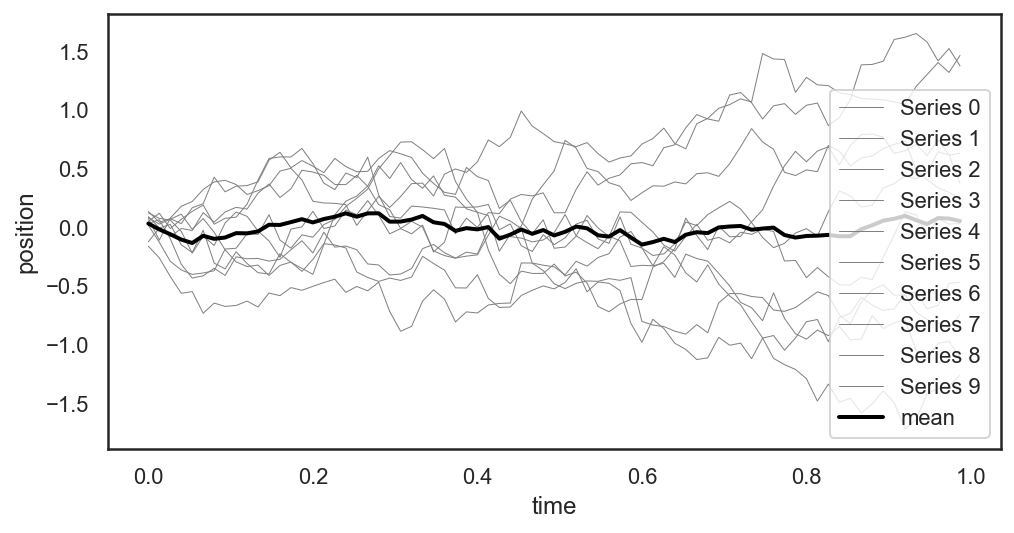

In [60]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], c='.5', lw=.5, zorder=-10, label=f"Series {i}")

ax.plot(X, Y.mean(axis=0), c="black", lw=2, label="mean")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

Look at the difference between Visualization 1, 2, and 3. Only things that we change is the line width, and the color.

#### Visualization 4 <a class="tocSkip"></a>

What happens if I need to see individual paths? Then, keeping the colors can be a good idea.

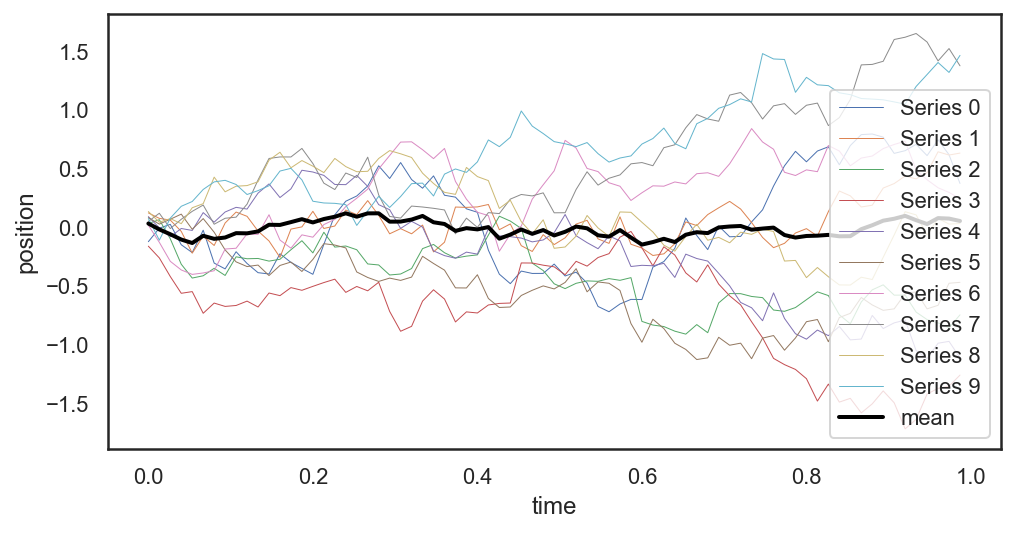

In [61]:
fig, ax = plt.subplots(figsize=(8,4))

for i in range(nb_processes):
    ax.plot(X, Y[i], lw=.5, zorder=-10, label=f"Series {i}")

ax.plot(X, Y.mean(axis=0), c="black", lw=2, label="mean")

ax.set_xlabel("time")
ax.set_ylabel("position")

plt.legend()
plt.show()

## Pay attention to colors

<div class="alert alert-block alert-info">

<b>Color</b> has potentially a huge impact on what you can see, for instance the <b>depth</b>. 
</div>

### Colormap examples

#### Example: Elevation, MRI scan, pyramid, and periodic function

Examples adapted from this <a href="https://towardsdatascience.com/your-colour-map-is-bad-heres-how-to-fix-it-lessons-learnt-from-the-event-horizon-telescope-b82523f09469">blog post</a> (<a href="">GitHub Repo</a>).

##### Generate / load data <a class="tocSkip"></a>

In [62]:
# Load hillshading and return elevation
with np.load('data_lec4/jacksboro_fault_dem.npz') as dem:
    elevation = dem["elevation"]
pd.DataFrame(elevation)

0    1    2    3    4    5    6    7    8    9    ...  393  394  395  \
0    483  487  491  493  488  485  483  478  454  434  ...  527  503  498   
1    475  486  489  490  486  478  473  475  463  439  ...  508  481  466   
2    479  485  488  487  481  472  465  462  454  442  ...  496  472  448   
3    466  472  481  485  474  464  459  459  457  455  ...  466  444  429   
4    464  474  480  478  477  476  473  474  472  463  ...  433  434  450   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
339  677  670  658  654  660  673  673  654  631  593  ...  269  271  273   
340  639  631  619  612  627  647  652  649  623  590  ...  271  274  277   
341  597  592  582  581  592  599  605  605  589  571  ...  275  276  274   
342  570  567  551  548  555  555  562  558  549  529  ...  276  276  274   
343  545  543  532  523  521  520  517  515  507  499  ...  274  270  271   

     396  397  398  399  400  401  402  
0    498  495  490  477  446  431  444  
1    468  467  467  452  432  440  457  
2    441  443  446  437  437  463  468  
3    425  425  428  420  431  468  485  
4    461  463  462  443  429  455  479  
..   ...  ...  ...  ...  ...  ...  ...  
339  273  271  266  261  264  266  268  
340  275  273  270  262  262  264  266  
341  273  272  268  261  259  268  274  
342  271  269  270  267  265  271  274  
343  272  272  269  268  268  270  272  

[344 rows x 403 columns]

In [63]:
# Load image of a medical scan
with gzip.open('data_lec4/s1045.ima.gz') as dfile:
    scan_im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))
pd.DataFrame(scan_im)

0    1    2    3    4    5    6    7    8    9    ...  246  247  248  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
251    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
252    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
253    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
254    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
255    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     249  250  251  252  253  254  255  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
251    0    0    0    0    0    0    0  
252    0    0    0    0    0    0    0  
253    0    0    0    0    0    0    0  
254    0    0    0    0    0    0    0  
255    0    0    0    0    0    0    0  

[256 rows x 256 columns]

In [64]:
def pyramid(n=513):
    """Create a pyramid function"""
    s = np.linspace(-1.0, 1.0, n)
    x, y = np.meshgrid(s, s)
    z = 1.0 - np.maximum(abs(x), abs(y))
    return x, y, z

pyramid_data = pyramid()
x, y, z = pyramid_data
pd.DataFrame(x)

0         1         2         3         4         5         6    \
0   -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
1   -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
2   -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
3   -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
4   -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
..   ...       ...       ...       ...       ...       ...       ...   
508 -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
509 -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
510 -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
511 -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   
512 -1.0 -0.996094 -0.992188 -0.988281 -0.984375 -0.980469 -0.976562   

          7        8         9    ...       503      504       505       506  \
0   -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
1   -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
2   -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
3   -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
4   -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
..        ...      ...       ...  ...       ...      ...       ...       ...   
508 -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
509 -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
510 -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
511 -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   
512 -0.972656 -0.96875 -0.964844  ...  0.964844  0.96875  0.972656  0.976562   

          507       508       509       510       511  512  
0    0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
1    0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
2    0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
3    0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
4    0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
..        ...       ...       ...       ...       ...  ...  
508  0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
509  0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
510  0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
511  0.980469  0.984375  0.988281  0.992188  0.996094  1.0  
512  0.980469  0.984375  0.988281  0.992188  0.996094  1.0  

[513 rows x 513 columns]

In [65]:
def periodic_fn():
    """Create a periodic function with a step function"""
    dx = dy = 0.05
    y, x = np.mgrid[-5: 5 + dy: dy, -5: 10 + dx: dx]
    z = np.sin(x) ** 10 + np.cos(10 + y * x) + np.cos(x) + 0.2 * y + 0.1 * x + \
        np.heaviside(x, 1) * np.heaviside(y, 1)
    z = z - np.mean(z)
    return x, y, z

periodic_fn_data = periodic_fn()
x, y, z = periodic_fn_data
pd.DataFrame(x)

0     1    2     3    4     5    6     7    8     9    ...   291  292  \
0   -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
1   -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
2   -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
3   -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
4   -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
..   ...   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...   
196 -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
197 -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
198 -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
199 -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   
200 -5.0 -4.95 -4.9 -4.85 -4.8 -4.75 -4.7 -4.65 -4.6 -4.55  ...  9.55  9.6   

      293  294   295  296   297  298   299   300  
0    9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
1    9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
2    9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
3    9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
4    9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
..    ...  ...   ...  ...   ...  ...   ...   ...  
196  9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
197  9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
198  9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
199  9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  
200  9.65  9.7  9.75  9.8  9.85  9.9  9.95  10.0  

[201 rows x 301 columns]

##### Visualize data <a class="tocSkip"></a>

In [66]:
def plot_examples(color_map, images):
    """Create the figure based on the provided images, continuous colormaps"""
    
    # Define number of rows and columns
    nrows, ncols = 1, len(images)
    
    # Create the figure
    fig = plt.figure(figsize=(15, 4), facecolor="white")
    
    # Init axis index
    axi = 1
    
    # Loop over all images
    for name, im in images.items():
        
        # Trick to identify 3D datasets
        if len(im) == 3:
            
            # Draw 3D projection
            px, py, pz = im
            ax = fig.add_subplot(nrows, ncols, axi, projection="3d", elev=10, azim=-45)
            ax.plot_surface(px, py, pz, cmap=color_map, linewidth=0, antialiased=False)
            
            # Remove ticks
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
            
        else:        
            # Draw 2D plot
            ax = fig.add_subplot(nrows, ncols, axi)
            ax.imshow(im, cmap=color_map, aspect="auto")

            # Remove axis
            ax.axis("off")

            # Make it square
            ax.set_aspect(1)

        # Put name
        ax.set_title(name)

        # Increment axis index
        axi += 1
    
    # Put a tilte to the figure
    fig.suptitle(color_map, fontsize=24)
    
    # Remove most of the white parts
    fig.tight_layout()
    return fig

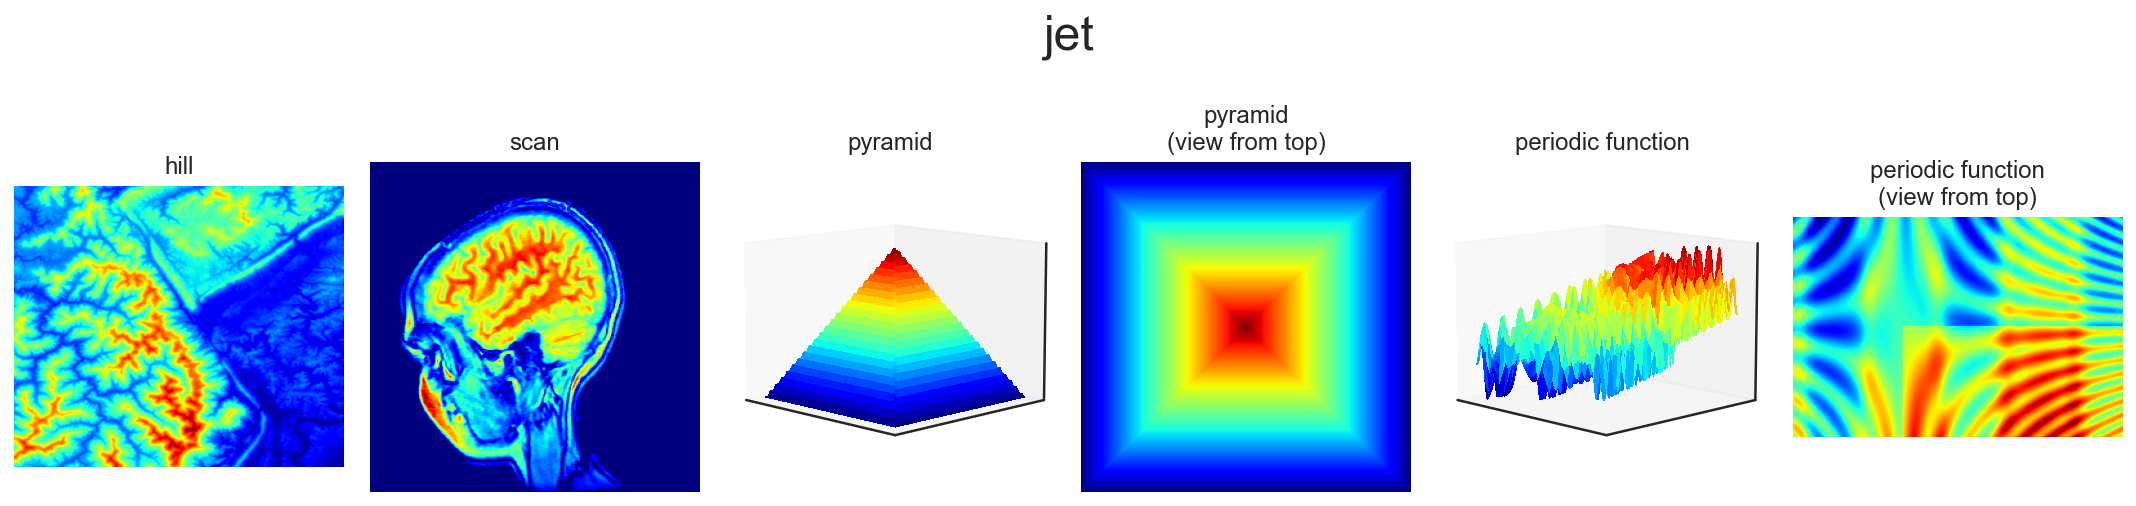

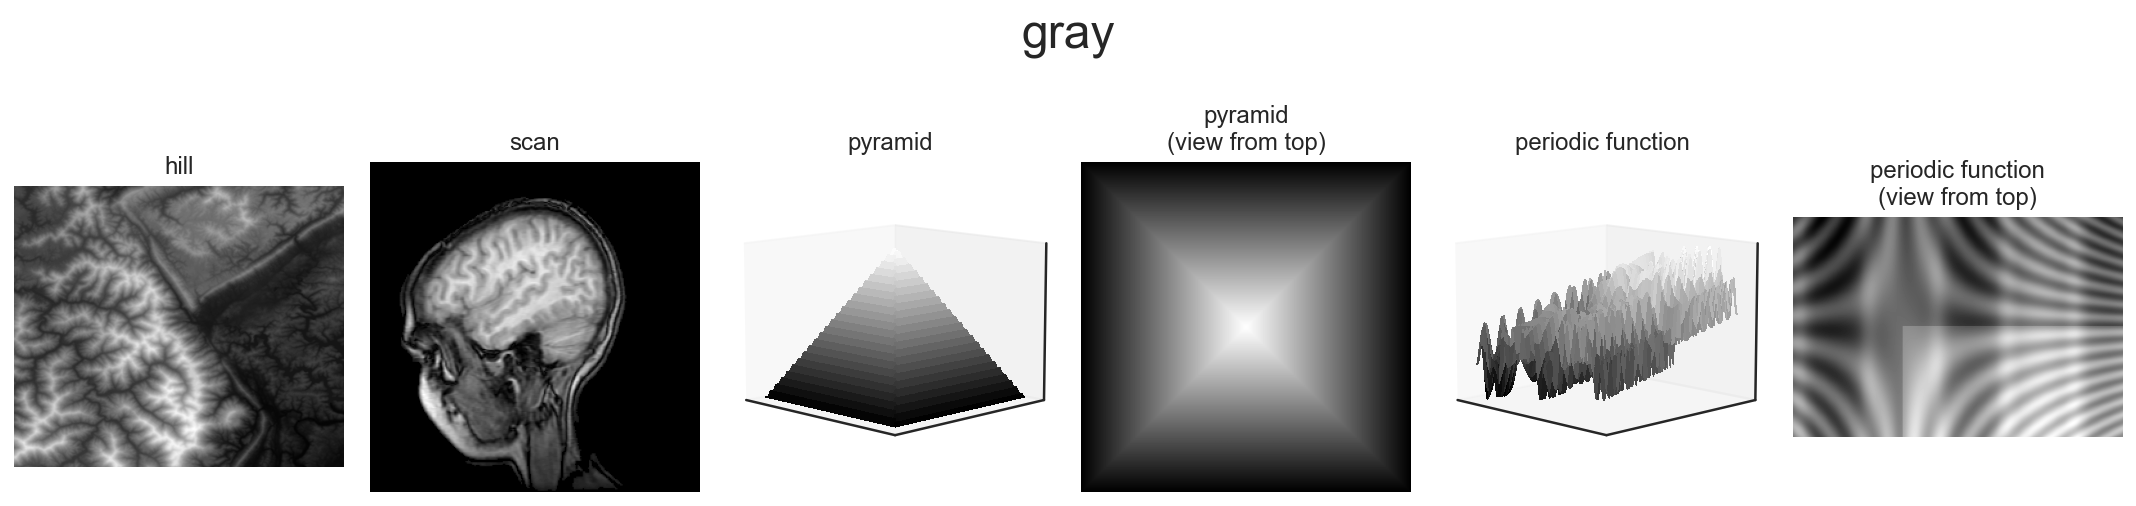

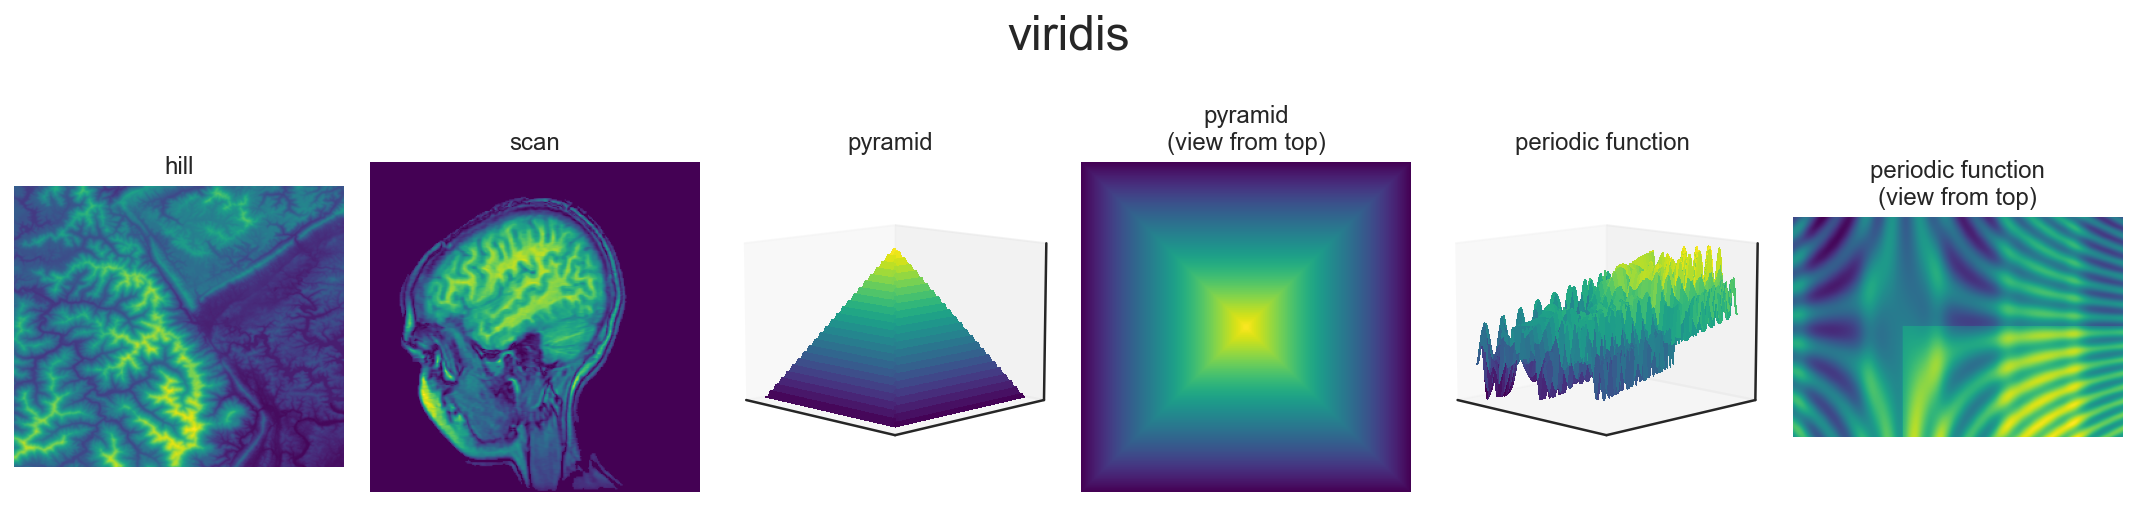

In [67]:
images = {
    "hill": elevation, 
    "scan": scan_im, 
    "pyramid": pyramid_data, 
    "pyramid\n(view from top)": pyramid_data[-1], 
    "periodic function": periodic_fn_data,
    "periodic function\n(view from top)": periodic_fn_data[-1]}

for color_map in ("jet", "gray", "viridis",):
    fig = plot_examples(color_map=color_map,
                        images=images)

Note that, even familiar, the `jet` colormap is not perceptually uniform, and should be avoided in the contexts depicted here. The `gray` colormap doesn't have this problem, but some details are more easily "hidden". The `viridis` colormap does a better job here.

## Redundancy is good!

<div class="alert alert-block alert-info">

Don't hesitate to give <b>several perspectives</b> on the same data. 
</div>

### Basic example: Histogram vs barplot

#### Generate data <a class="tocSkip"></a>

In [68]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
mean_1 = 150.0
mean_2 = 200.0

sigma_1 = 10.0
sigma_2 = 50.0

n = 100

In [69]:
# Create the samples
x1 = np.random.normal(mean_1, scale=sigma_1, size=n)
x2 = np.random.normal(mean_2, scale=sigma_2, size=n)
df = pd.DataFrame({"x1": x1, "x2": x2})
df

x1          x2
0   150.505617  236.912356
1   154.999513  232.537662
2   140.040911  230.737031
3   156.935985  193.671570
4   145.816985  278.943712
..         ...         ...
95  155.232477  202.473827
96  145.041815  186.934398
97  148.285354  243.837124
98  140.556314  175.856066
99  152.808647  150.729077

[100 rows x 2 columns]

#### Visualize data <a class="tocSkip"></a>

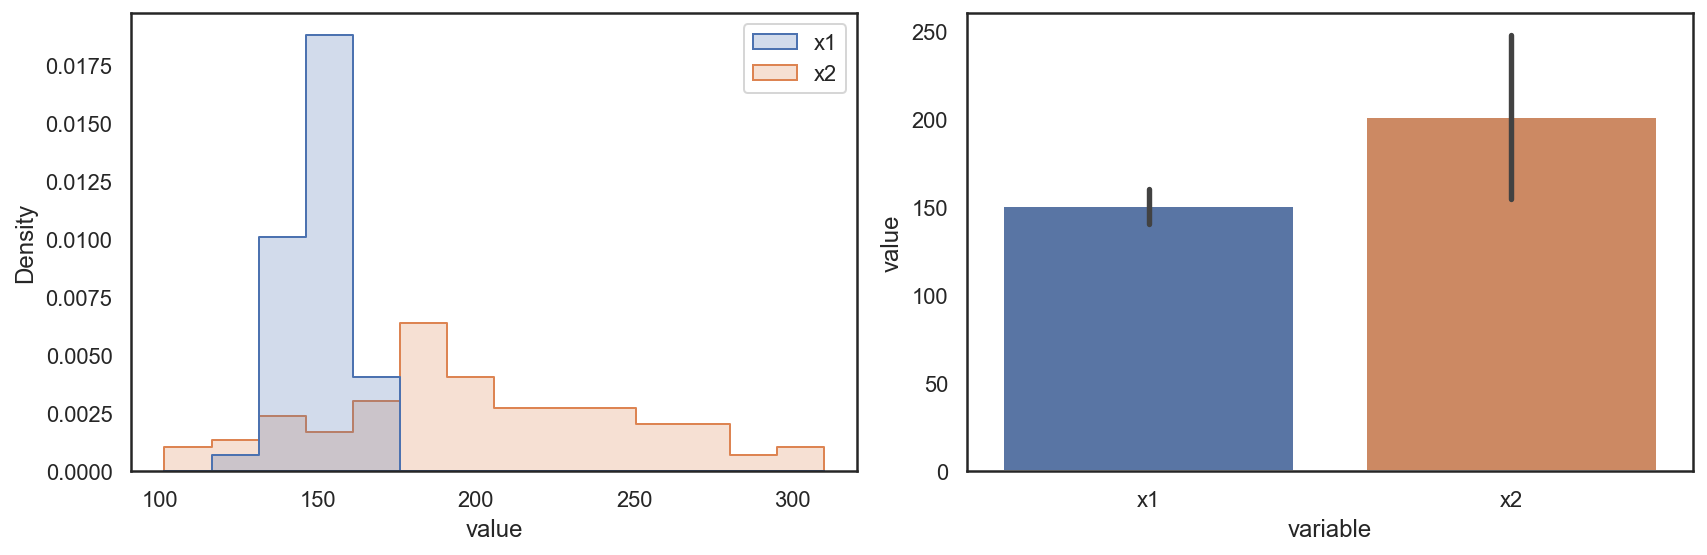

In [70]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# Create histogram
ax = axes[0]
sns.histplot(data=df, ax=ax, element="step", stat="density")
ax.set_xlabel("value")

# Create a barplot
ax = axes[1]
df_melted = df.melt()
sns.barplot(x="variable", y="value", ax=ax, data=df_melted, ci="sd")

plt.tight_layout()
plt.show()

The histograms and the bartplots give two perspectives on the data, which are complementary (the barplots summarize the information, while the histograms give a more 'detailed' view but more difficult to interpret).

### Penguins: Distribution joint plot

The examples are adapted from the [Seaborn's documentation](https://seaborn.pydata.org/tutorial/distributions.html).

This dataset (coming also from [Seaborn](https://github.com/mwaskom/seaborn-data)) contains several measures in penguins.

We will take a look at the bill length and depth.

<img src="img/lec4/penguin.png" width="300px" >

#### Load data <a class="tocSkip"></a>

In [71]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

#### Visualization 1 <a class="tocSkip"></a>

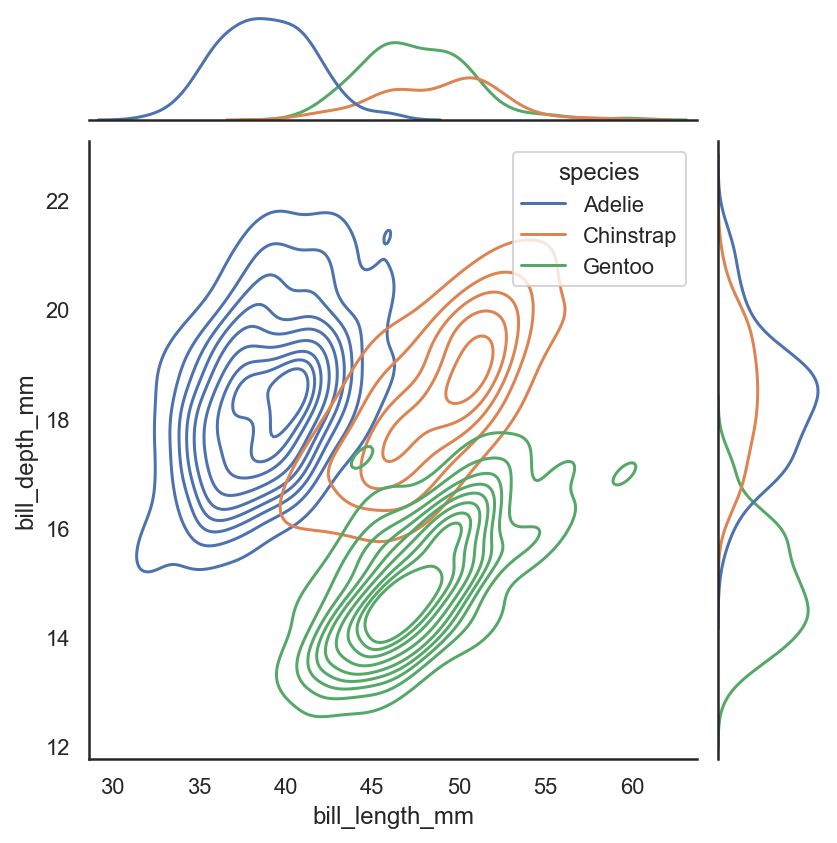

In [72]:
sns.set_theme(context="notebook", style="white")
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde");

#### Visualization 2 <a class="tocSkip"></a>

Same thing as visualization 1, but using a scatterplot as the central figure.

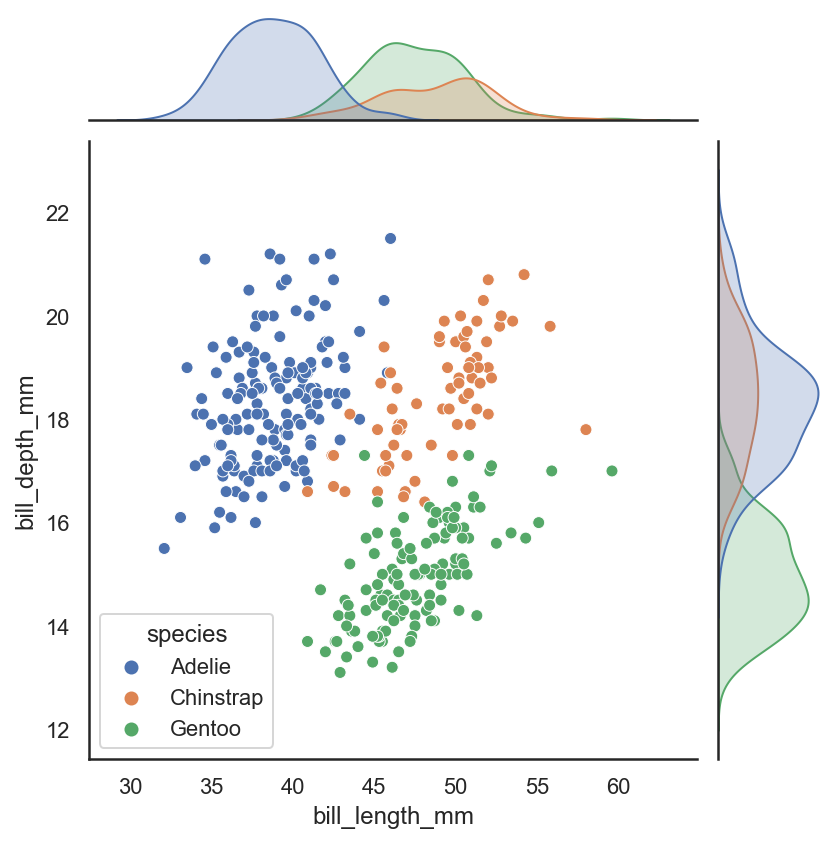

In [73]:
sns.set_theme(context="notebook", style="white")
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="scatter");

Here, contrary to the other examples, Visualization 2 is not better or worse than visualization 1. Both have the advantages to offer two perspectives on the data: the relation between bill depth and length depending on the species, and the distribution of each feature separately for each specie.

### Self-teaching application study

Data and figure coming from <a href="https://dl.acm.org/doi/10.1145/3397481.3450696">Nioche et al. (2021)</a>. Please accept my apologies for the auto-citation. My (bad) excuse is that (i) I thought it constitutes a good example for a '2 perspectives' figure, (ii) I have easy access to the code, (iii) it is a real use case.

The task consists in using a vocabulary learning application for 7 days. The experiment use a <a href="https://dictionary.apa.org/mixed-design">mixed design</a>. Each day, they are two sessions, such that either:
* The algorithm to generate the items to review/learn is the base line and uses a heuristic method ([Leitner system](https://en.wikipedia.org/wiki/Leitner_system)).
* The algorithm to generate the items to review/learn is one of the two versions of our own algorithm (one that we labeled 'Myopic', and the other one 'Conservative sampling').

#### Load data <a class="tocSkip"></a>

In [74]:
df = pd.read_csv("data_lec4/data_summary.csv", index_col=0)
# Select only the user that complete the task
df = df[df.n_ss_done == 14]
df

user     domain teacher_md  is_item_specific  \
32      firefly@active.fi  active.fi    forward              True   
48         mole@active.fi  active.fi  threshold              True   
33         fish@active.fi  active.fi  threshold              True   
34          fox@active.fi  active.fi    forward              True   
36         goat@active.fi  active.fi    forward              True   
37     goldfish@active.fi  active.fi  threshold              True   
38  grasshopper@active.fi  active.fi  threshold              True   
40     kangaroo@active.fi  active.fi    forward              True   
42          koi@active.fi  active.fi  threshold              True   
43      ladybug@active.fi  active.fi    forward              True   
44         lion@active.fi  active.fi    forward              True   
45     mackerel@active.fi  active.fi  threshold              True   
46       mantis@active.fi  active.fi    forward              True   
47  mockingbird@active.fi  active.fi  threshold              True   
49       monkey@active.fi  active.fi    forward              True   
30          eel@active.fi  active.fi  threshold              True   
50    orangutan@active.fi  active.fi    forward              True   
51       parrot@active.fi  active.fi    forward              True   
52      piranha@active.fi  active.fi    forward              True   
54      sealion@active.fi  active.fi    forward              True   
55        shark@active.fi  active.fi  threshold              True   
56       spider@active.fi  active.fi  threshold              True   
58     sturgeon@active.fi  active.fi    forward              True   
59         swan@active.fi  active.fi    forward              True   
60    swordfish@active.fi  active.fi  threshold              True   
61      tadpole@active.fi  active.fi    forward              True   
62      termite@active.fi  active.fi  threshold              True   
63       turtle@active.fi  active.fi    forward              True   
31          elk@active.fi  active.fi    forward              True   
64      vulture@active.fi  active.fi  threshold              True   
16        betta@active.fi  active.fi    forward              True   
8       anemone@active.fi  active.fi  threshold              True   
11       azalea@active.fi  active.fi  threshold              True   
12    barracuda@active.fi  active.fi    forward              True   
13         bear@active.fi  active.fi  threshold              True   
14          bee@active.fi  active.fi    forward              True   
15       beetle@active.fi  active.fi  threshold              True   
28      dolphin@active.fi  active.fi    forward              True   
17         bird@active.fi  active.fi  threshold              True   
18      buffalo@active.fi  active.fi  threshold              True   
19    butterfly@active.fi  active.fi    forward              True   
21          cat@active.fi  active.fi    forward              True   
7     amaryllis@active.fi  active.fi    forward              True   
22  caterpillar@active.fi  active.fi    forward              True   
6    amaranthus@active.fi  active.fi  threshold              True   
23       cicada@active.fi  active.fi  threshold              True   
24    clownfish@active.fi  active.fi    forward              True   
25         crab@active.fi  active.fi  threshold              True   
4    alchemilla@active.fi  active.fi  threshold              True   
26         crow@active.fi  active.fi  threshold              True   
27       cuckoo@active.fi  active.fi    forward              True   
3      ageratum@active.fi  active.fi    forward              True   
9     armadillo@active.fi  active.fi    forward              True   

    begin_with_active           first_ss_av_time            last_ss_av_time  \
32               True  2020-09-30 16:00:00+03:00  2020-10-06 16:06:40+03:00   
48               True  2020-09-30 18:00:00+03:00  2020-10-06 18:06:40+03:00   
33              False  2020-09-30 20:00:00+03:00  2020-10

#### Visualize data <a class="tocSkip"></a>

The code is quite long, but corresponds to what can be necessary for a "highly-tuned" figure.

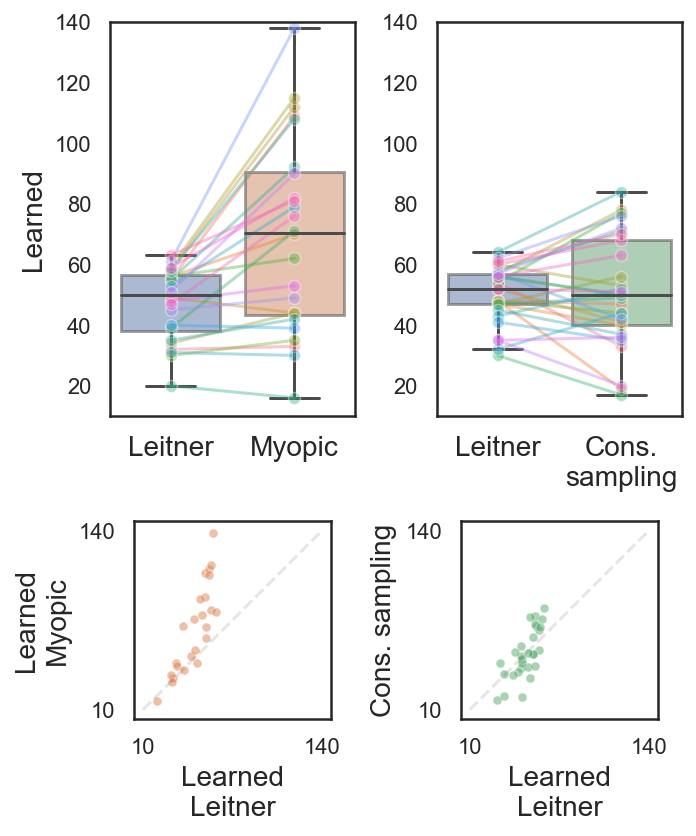

In [75]:
def roundup(x, base=1.):
    """
    Round up.
    If base=1, round up to the closest integer;
    if base=10, round up to the closest tens; etc.
    """
    return int(math.ceil(x / base)) * base


def rounddown(x, base=1.):
    """
    Round down.
    If base=1, round down to the closest integer;
    if base=10, round up to the closest tens; etc.
    """
    return int(math.floor(x / base)) * base


def scatter_n_learnt(data, active, ticks, ax, x_label, y_label, fontsize_label):
    
    # Select data based on condition
    data = data[data.teacher_md == active]
    
    # Select color
    color = "C1" if active == "threshold" else "C2"
    
    # Draw scatter
    sns.scatterplot(data=data,
                    x="n_recall_leitner",
                    y="n_recall_act",
                    color=color,
                    alpha=0.5, s=20,
                    ax=ax)
    
    # Put axis labels
    ax.set_xlabel(x_label, fontsize=fontsize_label)
    ax.set_ylabel(y_label, fontsize=fontsize_label)
    
    # Plot a dashed line (identity function)
    ax.plot(ticks, ticks, ls="--", color="black", alpha=0.1)
    
    # Set only a few ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    # Make it square
    ax.set_aspect(1)


def boxplot(df, ylabel, axes, ylim, fontsize_label):
    
    # Associate a color to each condition
    color_dic = {"leitner": "C0", "threshold": "C1", "forward": "C2"}
    # Change teacher names for display
    teacher_names = {"forward": "Cons.\nsampling",
                     "leitner": "Leitner",
                     "threshold": "Myopic"}

    for i, teacher in enumerate(('threshold', 'forward')):
        
        # Create a "slice" in the dataframe, depending on the condition
        slc = df.teacher_md == teacher
        df_slc = df[slc]
        
        # Get user names (that are used as ID), 
        # the number of items recalled for both conditions
        user = df_slc["user"]
        x = df_slc["n_recall_leitner"]
        y = df_slc["n_recall_act"]
        
        # Create a new dataframe to plot more easily
        df_plot = pd.DataFrame({"user": user, "leitner": x, teacher: y})
        # 'Flip' the dataframe
        df_melt = df_plot.melt(id_vars=["user"],
                               value_vars=["leitner", teacher],
                               value_name=ylabel, var_name="teacher")
        # Select axis
        ax = axes[i]
        
        # Set the order between the two boxplots, the colors, and the labels
        order = ["leitner", teacher]
        colors = [color_dic[o] for o in order]
        ticklabels = [teacher_names[o] for o in order]
        
        # Draw a pair of boxplot
        sns.boxplot(data=df_melt, x="teacher", y=ylabel, ax=ax,
                    showfliers=False, order=order, palette=colors,
                    boxprops=dict(alpha=.5))
        
        # Draw the dots and the connections between them
        sns.lineplot(data=df_melt,
                     x="teacher", y=ylabel, hue="user", alpha=0.4,
                     ax=ax, legend=False, marker="o")
        
        # Put the condition name
        ax.set_xticklabels(ticklabels, fontsize=fontsize_label)
        # Remove the x-axis label ("teacher")
        ax.set_xlabel("")
        # Put a 
        ax.set_ylabel(ylabel, fontsize=fontsize_label)
        ax.set_ylim(ylim)
    
    # Remove the y-label for the right pair of boxplots
    axes[-1].set_ylabel("")

# Find the minimum/maximum value all conditions included
min_v = min(df.n_recall_leitner.min(), df.n_recall_act.min())
max_v = max(df.n_recall_leitner.max(), df.n_recall_act.max())

# Compute y-axis limits based on rounded min/max values 
y_lim = (rounddown(min_v, base=10), roundup(max_v, base=10))

# Parameters plot
fontsize_title = 18
fontsize_subtitle = 18
fontsize_label_boxplot = 14
fontsize_letter = 20
fontsize_label_scatter = 14
figsize = (5, 6)

# Create figure
fig = plt.figure(figsize=figsize)

# Create axes
gs = gridspec.GridSpec(2, 2, height_ratios=[0.6, 0.3])
axes = [fig.add_subplot(gs[i, j]) for i in range(2) for j in  range(2)]

# Create left and right boxplot pairs
boxplot(df=df, axes=axes[:2],
        ylabel="Learned",
        ylim=y_lim,
        fontsize_label=fontsize_label_boxplot)

# Create left side scatter
scatter_n_learnt(data=df,
                 active="threshold",
                 x_label="Learned\nLeitner",
                 y_label="Learned\nMyopic",
                 ax=axes[2],
                 ticks=y_lim,
                 fontsize_label=fontsize_label_scatter)

# Create right side scatter
scatter_n_learnt(data=df,
                 active="forward",
                 x_label="Learned\nLeitner",
                 y_label="Cons. sampling",
                 ax=axes[3],
                 ticks=y_lim,
                 fontsize_label=fontsize_label_scatter)

plt.tight_layout() 

The scatter plots and the boxplots offer two perspectives on the same data, helping to understand the differences in the results between each condition.

## Don't forget that text can help

<div class="alert alert-block alert-info">

<b>Text</b> can <b>support the visualization</b>.
</div>

### Example: Trigonometric functions

Example adapted from <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a> (see <a href="https://github.com/rougier/ten-rules">GitHub repo</a>)

#### Generate data <a class="tocSkip"></a>

In [76]:
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C, S = np.cos(X), np.sin(X)

pd.DataFrame({"X": X, "C": C, "S": S})

X         C             S
0   -3.141593 -1.000000 -1.224647e-16
1   -3.116953 -0.999696 -2.463745e-02
2   -3.092313 -0.998786 -4.925994e-02
3   -3.067673 -0.997269 -7.385253e-02
4   -3.043033 -0.995147 -9.840028e-02
..        ...       ...           ...
251  3.043033 -0.995147  9.840028e-02
252  3.067673 -0.997269  7.385253e-02
253  3.092313 -0.998786  4.925994e-02
254  3.116953 -0.999696  2.463745e-02
255  3.141593 -1.000000  1.224647e-16

[256 rows x 3 columns]

#### Visualization 1 <a class="tocSkip"></a>

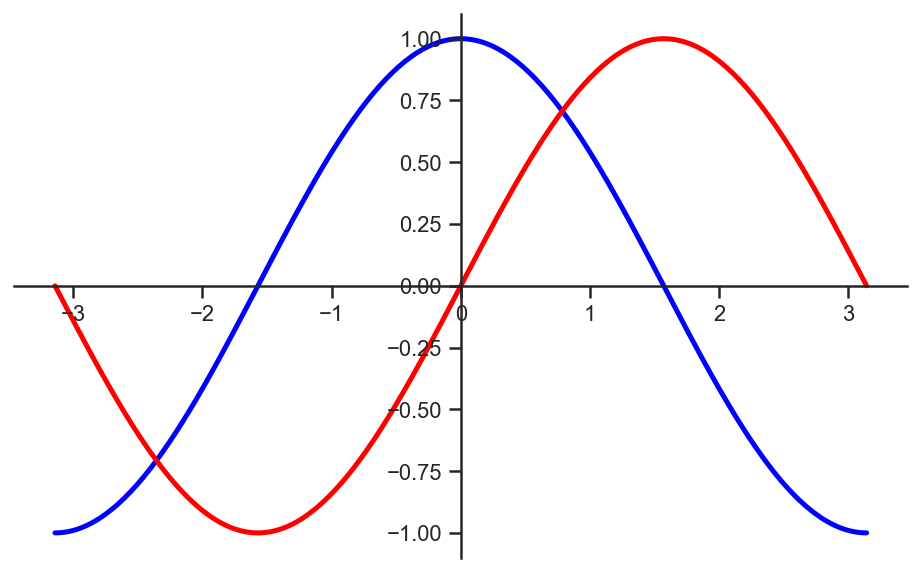

In [77]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine", zorder=-1)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine", zorder=-1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#### Visualization 2 <a class="tocSkip"></a>

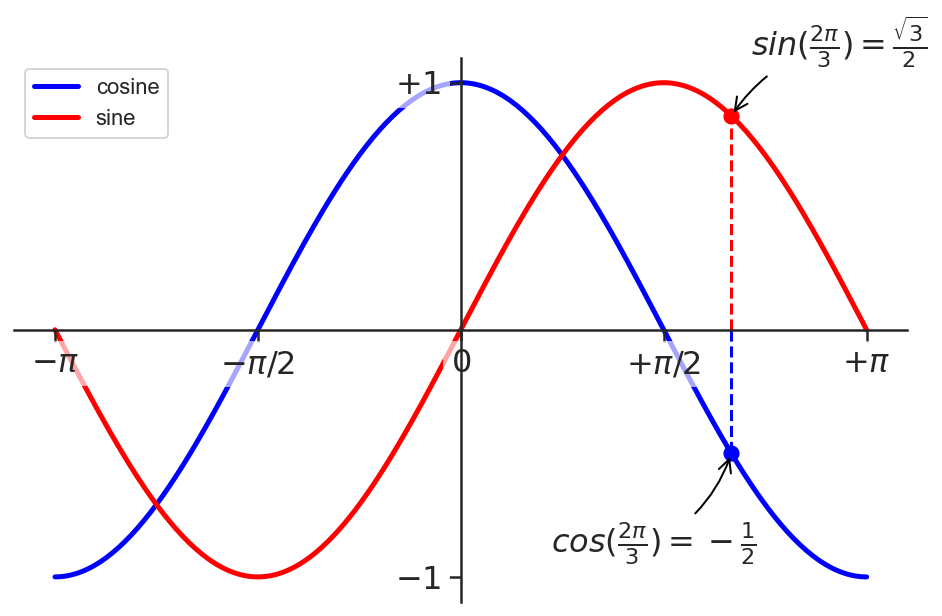

In [78]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine", zorder=-1)
ax.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine", zorder=-1)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left')

ax.set_xlim(X.min()*1.1, X.max()*1.1)
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ax.set_ylim(C.min()*1.1,C.max()*1.1)
ax.set_yticks([-1, +1])
ax.set_yticklabels([r'$-1$', r'$+1$'])

t = 2*np.pi/3
ax.plot([t,t],[0,np.cos(t)],
     color ='blue',  linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.cos(t),], 50, color ='blue')
ax.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', xy=(t, np.sin(t)),  xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="black"))

ax.plot([t,t],[0,np.sin(t)],
          color ='red',  linewidth=1.5, linestyle="--")
ax.scatter([t,],[np.sin(t),], 50, color ='red')
ax.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$', xy=(t, np.cos(t)),  xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="black"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65, zorder=1))

The text in visualization 2 helps to understand the figure and highlight particular point of interest.

# Recommended reading <a class="tocSkip"></a>

<a href="https://dl.acm.org/doi/pdf/10.1145/1743546.1743567">Heer et al. (2010)</a>

<a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833">Rougier et al. (2014)</a>

# Dataset <a class="tocSkip"></a>

[Gapminder](https://www.gapminder.org/data/) offers easy access to a lot of data, with a nice preview functionality.

<a href="https://data.world/">data.world</a> has a nice API. Price to pay is that you need to login.

In [99]:
import datadotworld as dw
results = dw.query(
	'chhs/ca-living-wage', 
    'SELECT * FROM living_wage')
results_df = results.dataframe

In [100]:
results_df

ind_id                                     ind_definition  reportyear  \
0         770  Living wage and percent of families with incom...        2010   
1         770  Living wage and percent of families with incom...        2010   
2         770  Living wage and percent of families with incom...        2010   
3         770  Living wage and percent of families with incom...        2010   
4         770  Living wage and percent of families with incom...        2010   
...       ...                                                ...         ...   
15864     770  Living wage and percent of families with incom...        2010   
15865     770  Living wage and percent of families with incom...        2010   
15866     770  Living wage and percent of families with incom...        2010   
15867     770  Living wage and percent of families with incom...        2010   
15868     770  Living wage and percent of families with incom...        2010   

       race_eth_code race_eth_name geotype  geotypevalue            geoname  \
0                1.0          AIAN      CA             6         California   
1                2.0         Asian      CA             6         California   
2                3.0     AfricanAm      CA             6         California   
3                4.0        Latino      CA             6         California   
4                5.0         NHOPI      CA             6         California   
...              ...           ...     ...           ...                ...   
15864            NaN          None      PL         87056  Yucca Valley town   
15865            NaN          None      PL         87056  Yucca Valley town   
15866            NaN          None      PL         87056  Yucca Valley town   
15867            NaN          None      PL         87056  Yucca Valley town   
15868            NaN          None      PL         87090        Zayante CDP   

          county_name  county_fips  ...   families  pct_lt_lw ll_95ci  \
0                None          NaN  ...     9509.0       26.6      NA   
1                None          NaN  ...   452847.0       18.0      NA   
2                None          NaN  ...   100319.0       20.3      NA   
3                None          NaN  ...  1156849.0       42.4      NA   
4                None          NaN  ...    10732.0       20.0      NA   
...               ...          ...  ...        ...        ...     ...   
15864  San Bernardino       6071.0  ...        NaN        NaN      NA   
15865  San Bernardino       6071.0  ...        NaN        NaN      NA   
15866  San Bernardino       6071.0  ...        NaN        NaN      NA   
15867  San Bernardino       6071.0  ...        NaN        NaN      NA   
15868      Santa Cruz       6087.0  ...        NaN        NaN      NA   

       ul_95ci  se  rse family_type_decile ca_rr livingwage    version  
0           NA  NA   NA               None  1.06      22.15 2013-09-29  
1           NA  NA   NA               None  0.72      22.15 2013-09-29  
2           NA  NA   NA               None  0.81      22.15 2013-09-29  
3           NA  NA   NA               None  1.70      22.15 2013-09-29  
4           NA  NA   NA               None  0.80      22.15 2013-09-29  
...        ...  ..  ...                ...   ...        ...        ...  
15864       NA  NA   NA               None   NaN      20.67 2013-09-29  
15865       NA  NA   NA               None   NaN      25.43 2013-09-29  
15866       NA  NA   NA               None   NaN      24.85 2013-09-29  
15867       NA  NA   NA               None   NaN      20.67 2013-09-29  
15868       NA  NA   NA               None   NaN        NaN 2013-09-29  

[15869 rows x 24 columns]

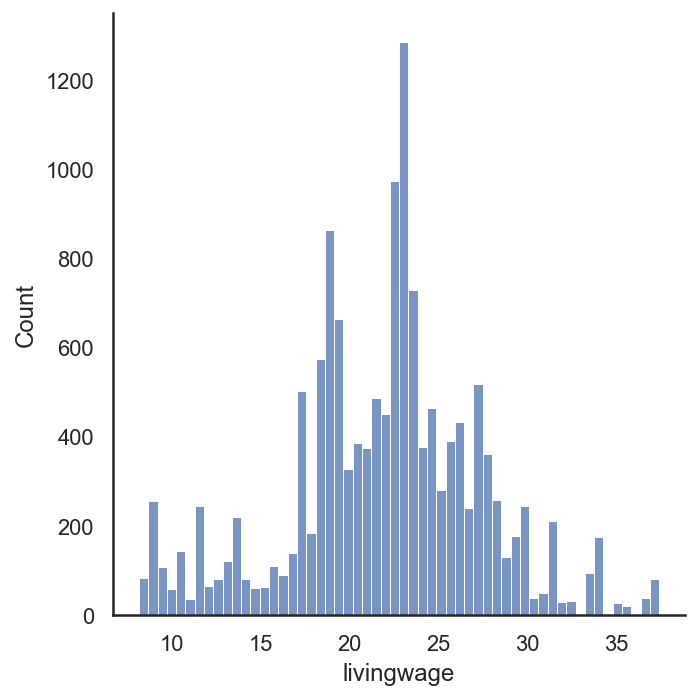

In [101]:
sns.displot(results_df.livingwage)

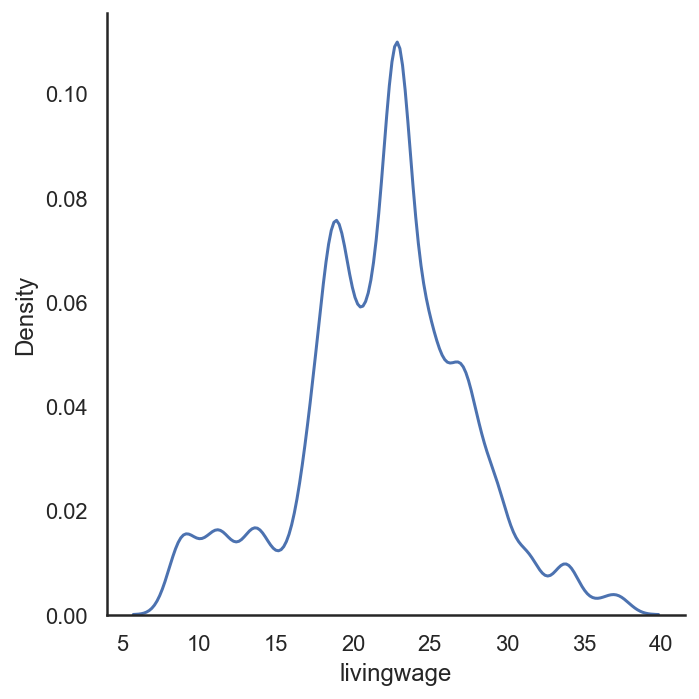

In [104]:
sns.displot(results_df.livingwage, kind="kde")

<AxesSubplot:xlabel='livingwage'>

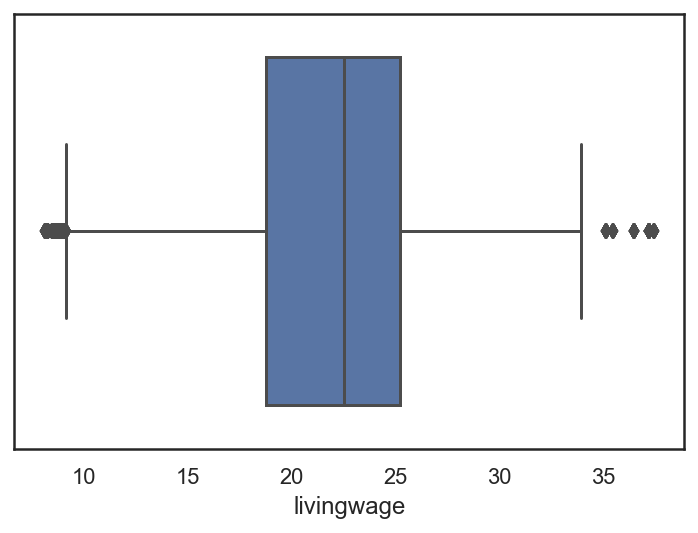

In [103]:
sns.boxplot(data=results_df, x="livingwage")